In [1]:
import sys
import os
cwd = os.getcwd()
parent_wd = cwd.replace('/notebooks', '')
sys.path.insert(1, parent_wd)
from taylor_utils.taylor import *
output_path = parent_wd + '/data_output/'

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.rcParams['text.usetex'] = True
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp
from scipy.stats import norm
from matplotlib.gridspec import GridSpec

import pickle
def save_pickle(data, file_name):
    """
    Saves data as pickle format
    """
    with open(file_name, 'wb') as f:
        pickle.dump(data, f)
    return None

### This is the jupyter notebook that can be used to re-run all the simulations and reproduce the figures in the paper "Taylor dispersion in arbitrarily shaped axisymmetric channels".

# I. Simulation

You can download all the simulation results required for producing the figures from this google drive link: https://drive.google.com/drive/folders/1xneR8ziiQxt7oBouS2jIv5crUIyPH6Jd?usp=sharing

You can also re-run the simulation yourself using the following codes:

### I-1. Diverging channel (Fig 3 & S1)

In [ ]:
a0 = 1
Pe0 = 10
beta = 1E-3
func_x = lambda x: a0 + beta*x

for seed in range(5):
    result =  simulation_var_cone_initialVar(Pe0 = Pe0, func_x = func_x, Nt0 = 500, seed = seed, sigx2_0 = 10)
    save_pickle(result, output_path+'result_r_Pe0_'+str(Pe0)+'_beta_'+str(beta)+'_initVar10_seed_'+str(seed))
    print(seed)

### I-2. Converging channel (Fig 3 & S1)

In [ ]:
a0 = 1
Pe0 = 10
beta_f = -1E-3
func_x = lambda x: a0 + beta_f*x

for seed in range(5):
    result =  simulation_var_cone_initialVar(Pe0 = Pe0, func_x = func_x, Nt0 = 26, seed = seed, sigx2_0 = 10)
    save_pickle(result, output_path+'result_r_Pe0_'+str(Pe0)+'_beta_'+str(beta_f)+'_initVar10_seed_'+str(seed))
    print(seed)

### I-3. Sinusoidal channel (Fig 4 & S2)

In [ ]:
func_x = lambda x: 1+0.2*np.sin(x/400)
Pe0 = 10
for seed in range(5):
    result =  simulation_var_cone_initialVar(Pe0 = Pe0, func_x = func_x, Nt0 = 500, seed = seed, sigx2_0 = 10)
    save_pickle(result, output_path+'result_periodic2_Pe0_'+str(Pe0)+'_initVar10_seed_'+str(seed))
    print(seed)

### I-4. Arbitrary channel (Fig 6)

In [ ]:
func_x = lambda x: 1+0.2*np.exp(-(x-500)**2/8000) + 0.1*np.exp(-(x-800)**2/20000) + 0.2*np.exp(-(x-2000)**2/100000) - 0.1*np.exp(-(x-3500)**2/2000000)
Pe0 = 10
for seed in range(5):
    result =  simulation_var_cone_initialVar(Pe0 = Pe0, func_x = func_x, Nt0 = 500, seed = seed, sigx2_0 = 10)
    save_pickle(result, output_path+'result_var3_Pe0_'+str(Pe0)+'_initVar10_seed_'+str(seed))
    print(seed)

### I-5. Engineered channel for constant variance (Fig 7)

In [ ]:
sigx2 = 300
U0 = 1
a0 = 1
D = 0.1
a_range = np.linspace(0.5,200,1000)
c1 = +12*sigx2/(U0**2*a0**4/(48*D**2))*np.log(a0) + (U0**2*a0**4/(48*D**2)-12*sigx2)*np.log(a0**2 + U0**2*a0**4/(48*D**2))/(U0**2*a0**4/(24*D**2))
x_of_a = ((+12*sigx2/(U0**2*a0**4/(48*D**2))*np.log(a_range) + (U0**2*a0**4/(48*D**2)-12*sigx2)*np.log(a_range**2 + U0**2*a0**4/(48*D**2))/(U0**2*a0**4/(24*D**2))) - c1)/(6*D/(U0*a0**2))
beta_cv = np.gradient(a_range, x_of_a)

func_x = interp1d(x_of_a, a_range, kind = 'cubic')
Pe0 = 10
for seed in range(5):
    result =  simulation_var_cone_initialVar(Pe0 = Pe0, func_x = func_x, Nt0 = 120, seed = seed, sigx2_0 = 300, upper_bound = 1500)
    save_pickle(result, output_path+'result_constantSig_Pe0_'+str(Pe0)+'_initVar300_seed_'+str(seed))
    print(seed)

### I-6. Engineered channel for sinusoidal spatial variance (Fig 7)

In [ ]:
sigx2 = 300
delt = 50
lamb = 600
U0 = 1
a0 = 1
D = 0.1
def engineered(x, a): return (-2*np.pi*delt/lamb*np.cos(2*np.pi*x/lamb) +2*a**2*D/(U0*a0**2) + 1/24*U0*a0**2/D)/(4*(sigx2+delt*np.sin(2*np.pi*x/lamb))/a + a/3)

sol = solve_ivp(engineered, [0, 1600], [a0], t_eval=np.linspace(0, 1600, 1600))
sol2 = solve_ivp(engineered, [0, -1000], [a0], t_eval=np.linspace(0, -1000, 1000))
plt.plot(sol2.t, sol2.y.flatten())
plt.plot(sol.t, sol.y.flatten())

func_x = interp1d(np.hstack([sol2.t[1:], sol.t]), np.hstack([sol2.y.flatten()[1:], sol.y.flatten()]), kind = 'cubic')
Pe0 = 10
for seed in range(5):
    result =  simulation_var_cone_initialVar(Pe0 = Pe0, func_x = func_x, Nt0 = 120, seed = seed, sigx2_0 = 303.97976805104173, upper_bound = 1500)
    save_pickle(result, output_path+'result_sineSig2_Pe0_'+str(Pe0)+'_initVar300_seed_'+str(seed))
    print(seed)

### I-7. clean up to create summarize file (smaller file size)

In [ ]:
name_list = ['result_r_Pe0_10_beta_0.001_initVar10_seed_', 
             'result_r_Pe0_10_beta_-0.001_initVar10_seed_', 
             'result_periodic2_Pe0_10_initVar10_seed_', 
             'result_var3_Pe0_10_initVar10_seed_', 
             'result_constantSig_Pe0_10_initVar300_seed_', 
             'result_sineSig2_Pe0_10_initVar300_seed_']

for name in name_list:
    for i in range(5):
        result = pickle.load(open(output_path+name+str(i), 'rb'))
        del result['x']
        del result['r']
        del result['theta']
        save_pickle(result, output_path+name+str(i)+'_summarized')
        print(i)

### I-8. long term dispersion behavior (Fig 5)

In [ ]:
# sinusoidal pattern
lambd = 200
delta = 0.05
func_x = lambda x: 1+delta*np.sin(2*np.pi*x/lambd)
for Pe0 in [0.1, 1, 10, 100, 1000]:
    for seed in range(5):
        result = simulation_var_cone_initialVar(Pe0 = Pe0, func_x = func_x, Nt0 = 500, seed = seed, sigx2_0 = 10)
        del result['x']
        del result['r']
        del result['theta']
        save_pickle(result, output_path+'result_periodic_lit_Pe0_'+str(Pe0)+'_lambda_'+str(lambd)+'_delta_'+str(delta)+'_seed_'+str(seed)+'_summarized')
        print(seed)

In [ ]:
# triangular wave pattern
lambd = 200
delta = 0.05
func_x = lambda x: 1 + delta*(x%lambd)/(lambd*2/3) - delta*(x%lambd-lambd*2/3)*(1/(lambd*1/3) + 1/(lambd*2/3))*np.heaviside(x%lambd-lambd*2/3, 0)
for Pe0 in [0.1, 1, 10, 100, 1000]:
    for seed in range(5):
        result = simulation_var_cone_initialVar(Pe0 = Pe0, func_x = func_x, Nt0 = 500, seed = seed, sigx2_0 = 10)
        del result['x']
        del result['r']
        del result['theta']
        save_pickle(result, output_path+'result_periodic_triang_lit_Pe0_'+str(Pe0)+'_lambda_'+str(lambd)+'_delta_'+str(delta)+'_seed_'+str(seed)+'_summarized')
        print(seed)

In [ ]:
# exponential sine wave pattern
lambd = 200
delta = 0.05
func_x = lambda x: np.exp(np.sin(2*np.pi*x/lambd))/np.exp(1)*delta + (1 - delta/np.exp(1))
for Pe0 in [0.1, 1, 10, 100, 1000]:
    for seed in range(5):
        result = simulation_var_cone_initialVar(Pe0 = Pe0, func_x = func_x, Nt0 = 500, seed = seed, sigx2_0 = 10)
        del result['x']
        del result['r']
        del result['theta']
        save_pickle(result, output_path+'result_periodic_expsin_lit_Pe0_'+str(Pe0)+'_lambda_'+str(lambd)+'_delta_'+str(delta)+'_seed_'+str(seed)+'_summarized')
        print(seed)

In [ ]:
# summarize simulation output
lambd = 200
delta = 0.05
D_eff_sim = np.zeros((1,5))
D_eff_curr = np.zeros((1,5))
D_eff_lit= np.zeros((1,5))
Pe0_range = [0.1, 1, 10, 100, 1000]
for j, Pe0 in enumerate(Pe0_range):
    mean = []
    for seed in range(5):
        name_head = 'result_periodic_lit_Pe0_'+str(Pe0)+'_lambda_'+str(lambd)+'_delta_'+str(delta)+'_seed_'
        result = pickle.load(open(output_path+name_head+str(i)+'_summarized', 'rb'))
        n = len(result['weighted_var'])
        mean.append(np.mean((result['weighted_var']/(2*result['D']*result['T']))[int(n/2):]))
    D_eff_sim[0, j] = np.mean(mean)
    loc_max = np.max(np.where(result['predicted_var_heuristic'] < lambd**2))
    D_eff_curr[0, j] = np.mean((result['predicted_var_heuristic']/(2*result['D']*result['T']))[1:loc_max])
    
    Pe_lambd = Pe0*lambd
    D0_eff = (16 + 120*delta**2 + 90*delta**4 + 5*delta**6)/(16*(1+delta**2/2))
    D1_eff = Pe_lambd**2/48*(1+3*delta**2+3*delta**4/8)/(1+delta**2/2)**3
    D2_eff = Pe_lambd**2*43*np.pi**2*delta**2*(1+3*delta**2/2+delta**4/8)/(480*(1+delta**2/2)**3)
    D_eff = D0_eff+1/lambd**2*D1_eff+1/lambd**4*D2_eff
    D_eff_lit[0,j] = D_eff
        
        
lambd = 200
delta = 0.05
D_eff_sim_tri = np.zeros((1,5))
D_eff_curr_tri = np.zeros((1,5))
Pe0_range = [0.1, 1, 10, 100, 1000]
for j, Pe0 in enumerate(Pe0_range):
    mean = []
    for seed in range(5):
        name_head = 'result_periodic_triang_lit_Pe0_'+str(Pe0)+'_lambda_'+str(lambd)+'_delta_'+str(delta)+'_seed_'
        result = pickle.load(open(output_path+name_head+str(i)+'_summarized', 'rb'))
        n = len(result['weighted_var'])
        mean.append(np.mean((result['weighted_var']/(2*result['D']*result['T']))[int(n/2):]))
    D_eff_sim_tri[0, j] = np.mean(mean)
    loc_max = np.max(np.where(result['predicted_var_heuristic'] < lambd**2))
    D_eff_curr_tri[0, j] = np.mean((result['predicted_var_heuristic']/(2*result['D']*result['T']))[1:loc_max])

lambd = 200
delta = 0.05
D_eff_sim_expsin = np.zeros((1,5))
D_eff_curr_expsin = np.zeros((1,5))
Pe0_range = [0.1, 1, 10, 100, 1000]
for j, Pe0 in enumerate(Pe0_range):
    mean = []
    for seed in range(5):
        name_head = 'result_periodic_expsin_lit_Pe0_'+str(Pe0)+'_lambda_'+str(lambd)+'_delta_'+str(delta)+'_seed_'
        result = pickle.load(open(output_path+name_head+str(i)+'_summarized', 'rb'))
        n = len(result['weighted_var'])
        mean.append(np.mean((result['weighted_var']/(2*result['D']*result['T']))[int(n/2):]))
    D_eff_sim_expsin[0, j] = np.mean(mean)
    loc_max = np.max(np.where(result['predicted_var_heuristic'] < lambd**2))
    D_eff_curr_expsin[0, j] = np.mean((result['predicted_var_heuristic']/(2*result['D']*result['T']))[1:loc_max])

## Figure 2 -- regimes of negative variance growth

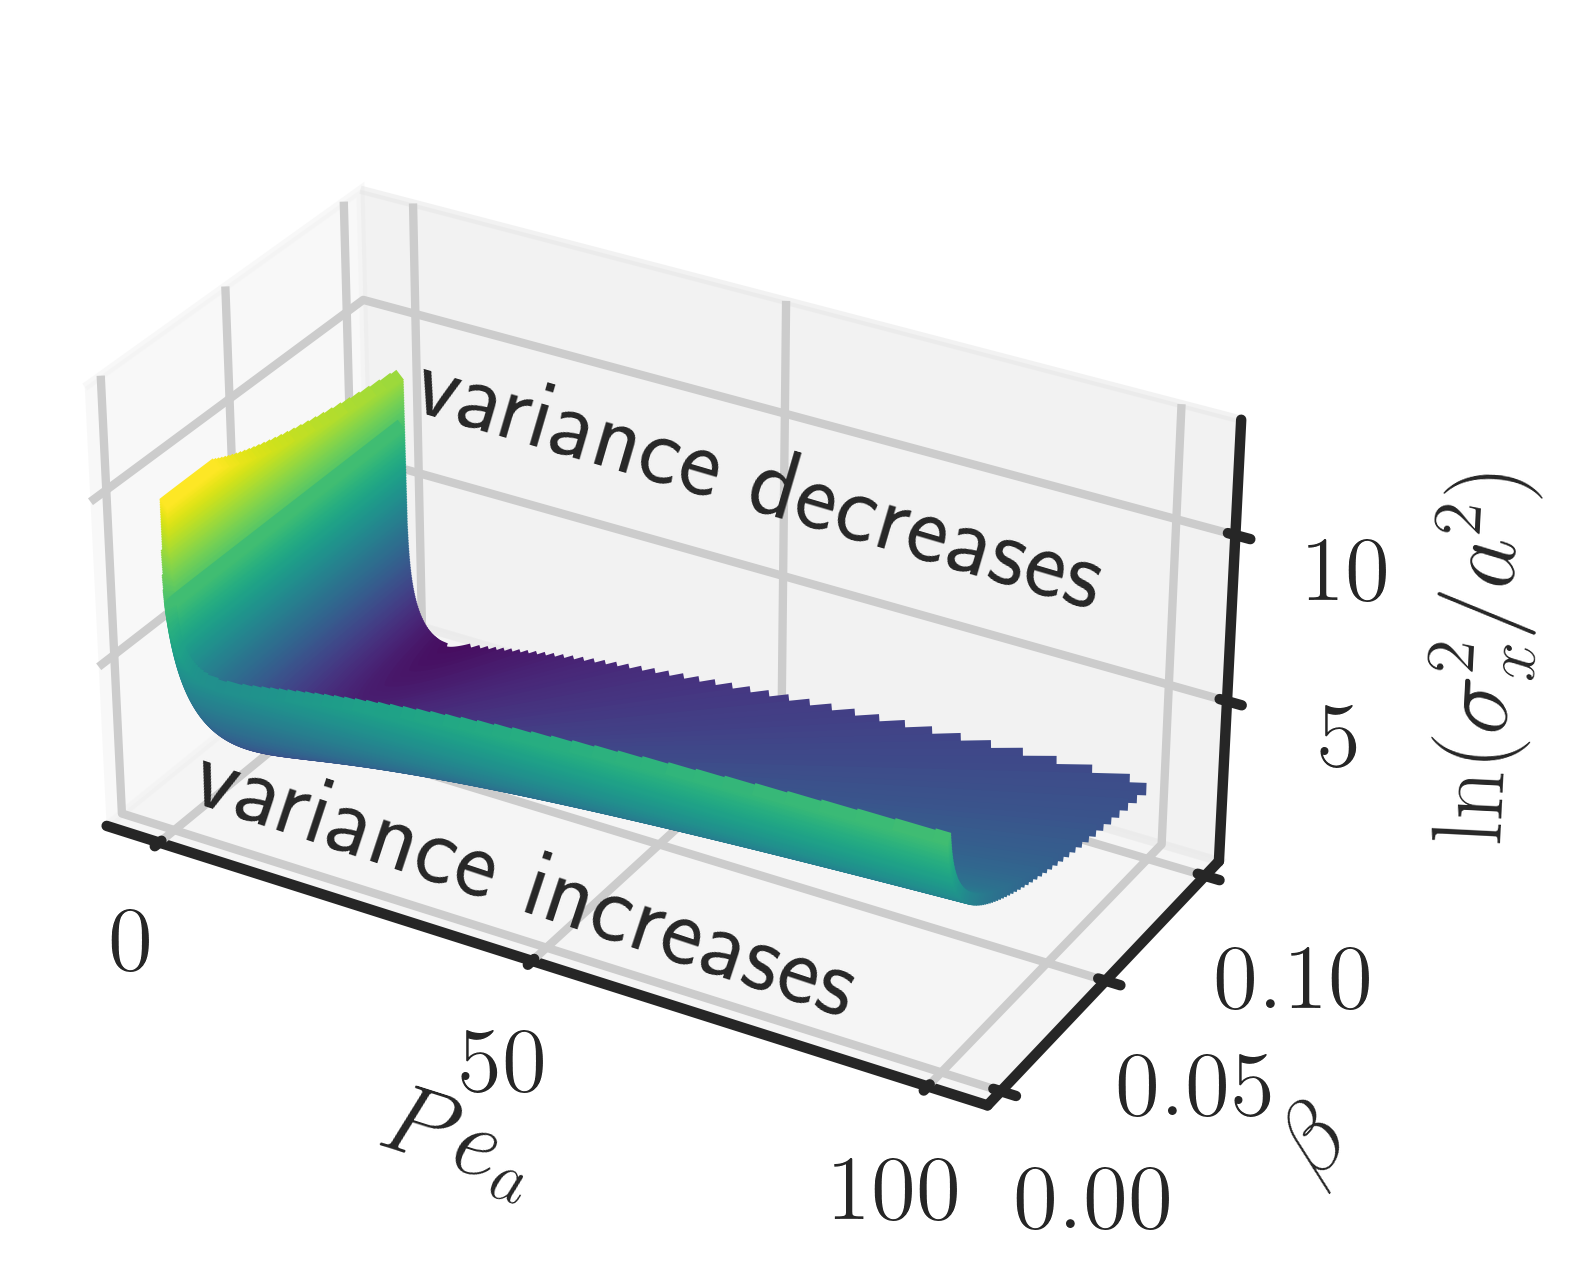

In [880]:
%matplotlib inline
sns.set_style('ticks')
sns.set_context('talk')
x = np.linspace(0.001, 100, 1000) # Pe_a
y = np.linspace(0.001, 0.1, 1000) # beta

X, Y = np.meshgrid(x, y)
Z = np.log(2*(1 + 1/48*X**2 - 1/6*X*Y)/(4*X*Y*(1 + Y**2/6))) # ln(sig2/a2)

fig = plt.figure(dpi = 400)
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='viridis', levels = np.linspace(0,10,200))
ax.set_xlabel(r'$Pe_{a}$', labelpad = 10)
ax.set_ylabel(r'$\beta$', labelpad = 5)
ax.set_zlabel(r'$\ln(\sigma^2_x/a^2)$')
ax.set_box_aspect(aspect = (2,1,1))
ax.text(0, 0.1, 1, "variance decreases",'x')
ax.text(0, 0, -6, "variance increases",'x')
plt.savefig('regime_lowRes.png', dpi = 150, transparent = False)
plt.savefig('regime_highRes.png', dpi = 400, transparent = False)
plt.show()

In [50]:
# This one will create a pop-up window, and you need to mark the location of the labels on each contour line. 
# If you don't want that, replace the line "%matplotlib qt" with "%matplotlib inline", and un-comment the code related to cbar.
%matplotlib qt 
sns.set_style('ticks')
x = np.linspace(0.001, 100, 1000) # Pe_a
y = np.linspace(0.001, 0.1, 1000) # beta

X, Y = np.meshgrid(x, y)
Z = np.log(2*(1 + 1/48*X**2 - 1/6*X*Y)/(4*X*Y*(1 + Y**2/6))) # ln(sig2/a2)

fig, ax = plt.subplots(dpi = 200)
CS = plt.contour(X, Y, Z, cmap = 'viridis', levels = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
ax.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel(r'$Pe_{a}$', fontsize = 30)
plt.ylabel(r'$\beta$', fontsize = 30)
ax.clabel(CS, CS.levels, inline=True, fontsize=15, manual=True, colors = 'black')
#cbar = plt.colorbar()
#cbar.ax.set_title(r'$\beta$', fontsize = 30)
#cbar.ax.tick_params(labelsize=20)

#plt.savefig('regime_sideview2-3_lowRes.png', dpi = 150, transparent = False, bbox_inches = "tight")
#plt.savefig('regime_sideview2-3_highRes.png', dpi = 400, transparent = False, bbox_inches = "tight")
plt.show()

Select label locations manually using first mouse button.
End manual selection with second mouse button.


## Figure 3 & S1 -- diverging & converging

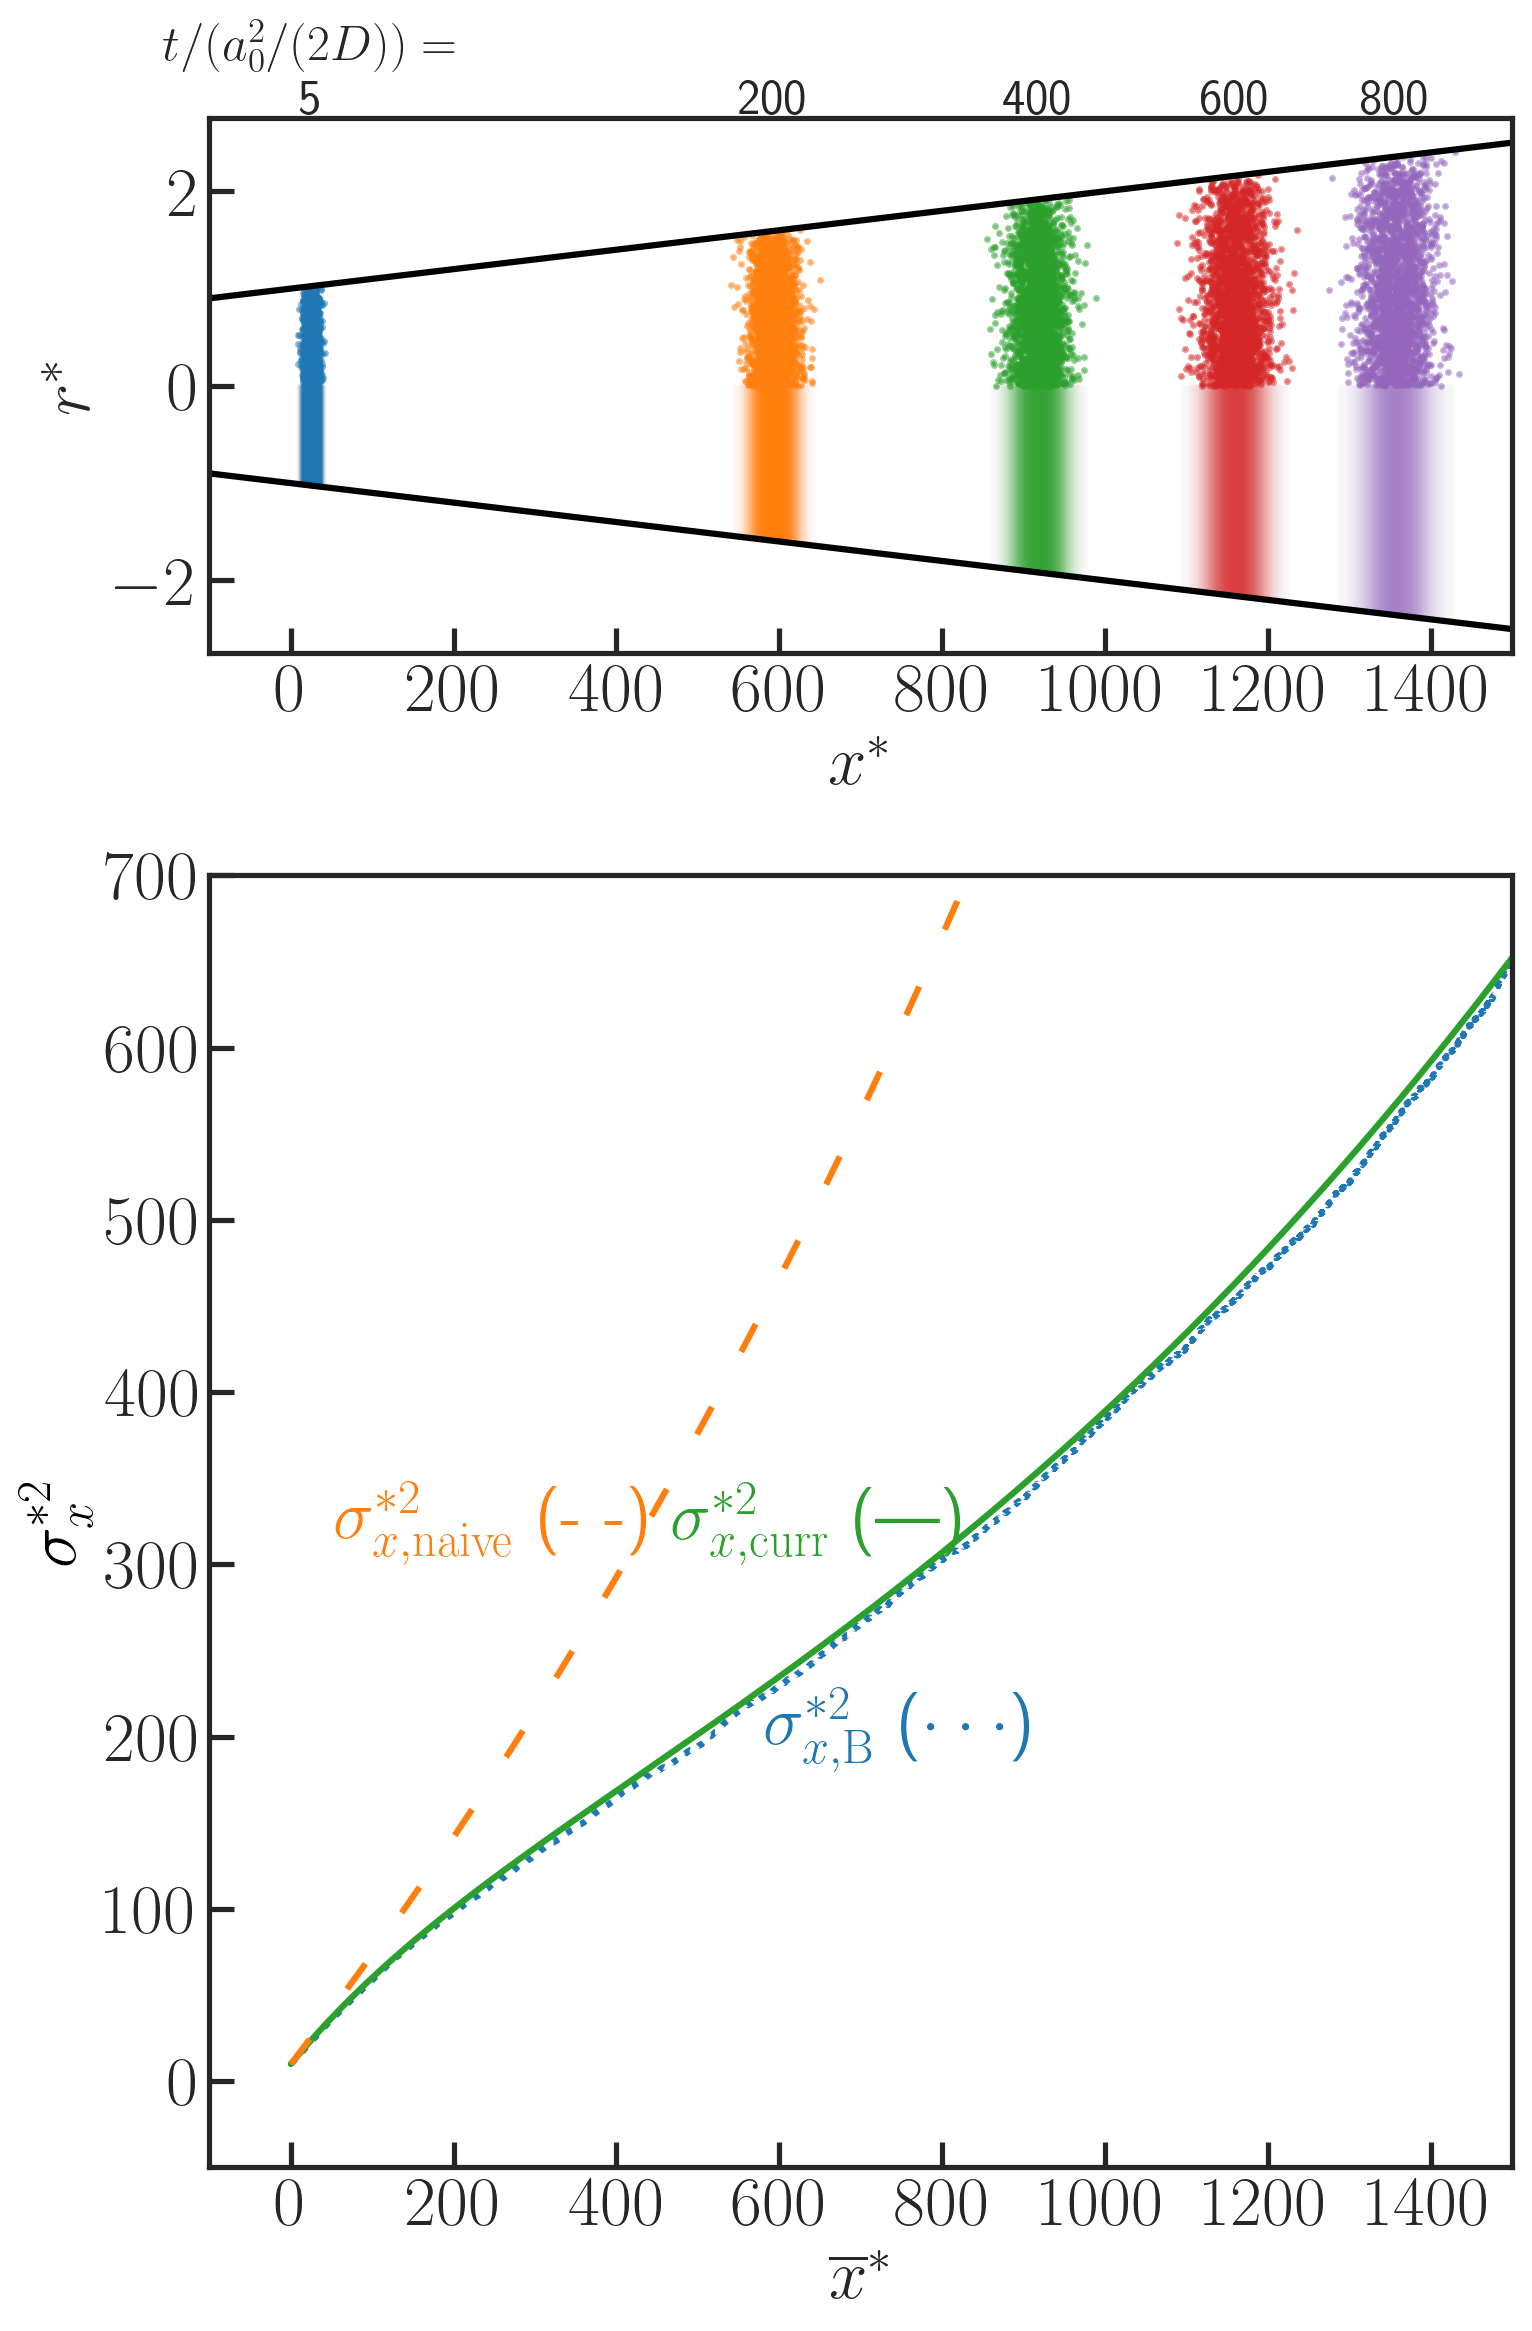

In [15]:
%matplotlib inline
sns.set_context('talk')
sns.set_style('ticks')
fig = plt.figure(dpi = 200, figsize = (8,12))
gs = GridSpec(nrows=3, ncols=1)

ax0 = fig.add_subplot(gs[0, 0])

name_head = 'result_r_Pe0_10_beta_0.001_initVar10_seed_'
func_x = lambda x : 1 + 0.001*x
result = pickle.load(open(output_path+name_head+str(0), 'rb'))
plt.plot(np.linspace(-100,1500,1000), func_x(np.linspace(-100,1500,1000)), color = 'black')
plt.plot(np.linspace(-100,1500,1000), -func_x(np.linspace(-100,1500,1000)), color = 'black')

#j_range = [10, 500, 1000, 2000, 3000, 4000]
j_range = [100, 4000, 8000, 12000, 16000]
cmap_list = ['Greys', 'Blues', 'Oranges', 'Greens', 'Reds', 'Purples']

for m, j2 in enumerate(j_range):
    j = np.argmin(np.abs(result['weighted_x'].flatten()[j2] - result['predicted_x_bar']))
    
    X = result['x'][:, j2]
    R = np.copy(result['r'][:, j2])
    R_plot = np.zeros_like(R)
    THETA = result['theta'][:, j2]
    loc_neg = THETA < 0
    R_plot = R[~loc_neg]
    Y = R_plot*np.sin(THETA[~loc_neg])
    X_plot = X[~loc_neg]
    plt.scatter(X_plot, Y, s = 1, alpha = 0.5, label = r'$t=$'+ '{:.1f}'.format(result['T'][j2]/(result['a0']**2/(2*result['D']))) + r'$a_0^2/(2D)$')
     
    xmin = np.min(X_plot)
    xmax = np.max(X_plot)
    i_plot = 200
    x_pdf = np.linspace(xmin, xmax, i_plot)
    alpha_all = (norm.pdf(x_pdf, result['predicted_x_bar'][j], 
                             np.sqrt(result['predicted_var_heuristic'][j]))/np.max(norm.pdf(x_pdf, result['predicted_x_bar'][j], 
                                                                                            np.sqrt(result['predicted_var_heuristic'][j])))
                 *np.exp(result['predicted_ln_cdx_heuristic'][j] - np.max(result['predicted_ln_cdx_heuristic'])))
    for i in range(i_plot-1):
        plt.fill_between(x_pdf[i:i+2], -func_x(x_pdf[i:i+2]), color = 'C'+str(m), alpha = alpha_all[i])
    
    if m == 0:
        plt.text(result['predicted_x_bar'][j], 2.7, r'$t/(a_0^2/(2D))=$'+ '\n{:.0f}'.format(result['T'][j2]/(result['a0']**2/(2*result['D']))), horizontalalignment='center', verticalalignment='bottom')
    else:
        plt.text(result['predicted_x_bar'][j], 2.7, '{:.0f}'.format(result['T'][j2]/(result['a0']**2/(2*result['D']))), horizontalalignment='center', verticalalignment='bottom')
    
plt.xlim([-100, 1500])
#plt.ylim([ymin-0.1, -ymin+0.1])
plt.xlabel(r'$x^*$', fontsize = 25)
plt.ylabel(r'$r^*$', fontsize = 25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
ax0.tick_params(axis='both', direction = 'in')
#plt.gca().set(aspect=80)


#plt.subplot(2,1,2)
ax1 = fig.add_subplot(gs[1:3, 0])
weighted_x_mean = []
weighted_var_mean = []
predicted_x_bar_mean = []
predicted_var_mean = []
predicted_var_naive_mean = []
for i in range(5):
    result = pickle.load(open(output_path+name_head+str(i)+'_summarized', 'rb'))
    weighted_x_mean.append(result['weighted_x'].flatten())
    weighted_var_mean.append(result['weighted_var'].flatten())
    predicted_x_bar_mean.append(result['predicted_x_bar'])
    predicted_var_mean.append(result['predicted_var_heuristic'])
    predicted_var_naive_mean.append(result['predicted_var'])
weighted_x_mean = np.mean(np.vstack(weighted_x_mean), axis = 0)
weighted_var_mean = np.mean(np.vstack(weighted_var_mean), axis = 0)
predicted_x_bar_mean = np.mean(np.vstack(predicted_x_bar_mean), axis = 0)
predicted_var_mean = np.mean(np.vstack(predicted_var_mean), axis = 0)
predicted_var_naive_mean = np.mean(np.vstack(predicted_var_naive_mean), axis = 0)

plt.plot(weighted_x_mean, weighted_var_mean, label = r'$\sigma^2_{x, \mathrm{B}}\enspace$'+': Brownian prediction', color = 'C0', linestyle = 'dotted')
plt.plot(predicted_x_bar_mean, predicted_var_mean, label = r'$\sigma^2_{x, \mathrm{curr}}$'+': current model', color = 'C2', alpha = 1)
plt.plot(predicted_x_bar_mean, predicted_var_naive_mean, label = r'$\sigma^2_{x, \mathrm{naive}}$'+': naive', color = 'C1', alpha = 1, linestyle = (0,(5,10)))
plt.xlabel(r'$\overline{x}^*$', fontsize = 25)
plt.ylabel(r'$\sigma^{*2}_x$', fontsize = 25, color = 'black')
plt.ylim([-100, 1200])
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
ax1.tick_params(axis='both', direction = 'in')

plt.text(650, 300, r'$\sigma^{*2}_{x, \mathrm{curr}}$'+' (—)', color = 'C2', fontsize = 25, horizontalalignment='center', verticalalignment='bottom')
plt.text(750, 180, r'$\sigma^{*2}_{x, \mathrm{B}}$'+r' ($\cdot\cdot\cdot$)', color = 'C0', fontsize = 25, horizontalalignment='center', verticalalignment='bottom')
plt.text(250, 300, r'$\sigma^{*2}_{x, \mathrm{naive}}$'+r' (- -)', color = 'C1', fontsize = 25, horizontalalignment='center', verticalalignment='bottom')
plt.xlim([-100, 1500])
plt.ylim([-50, 700])
plt.tight_layout()
plt.savefig('Fig_diverg_initVar_highRes.png', dpi = 400, bbox_inches = "tight")
plt.savefig('Fig_diverg_initVar_lowRes.png', dpi = 150, bbox_inches = "tight")

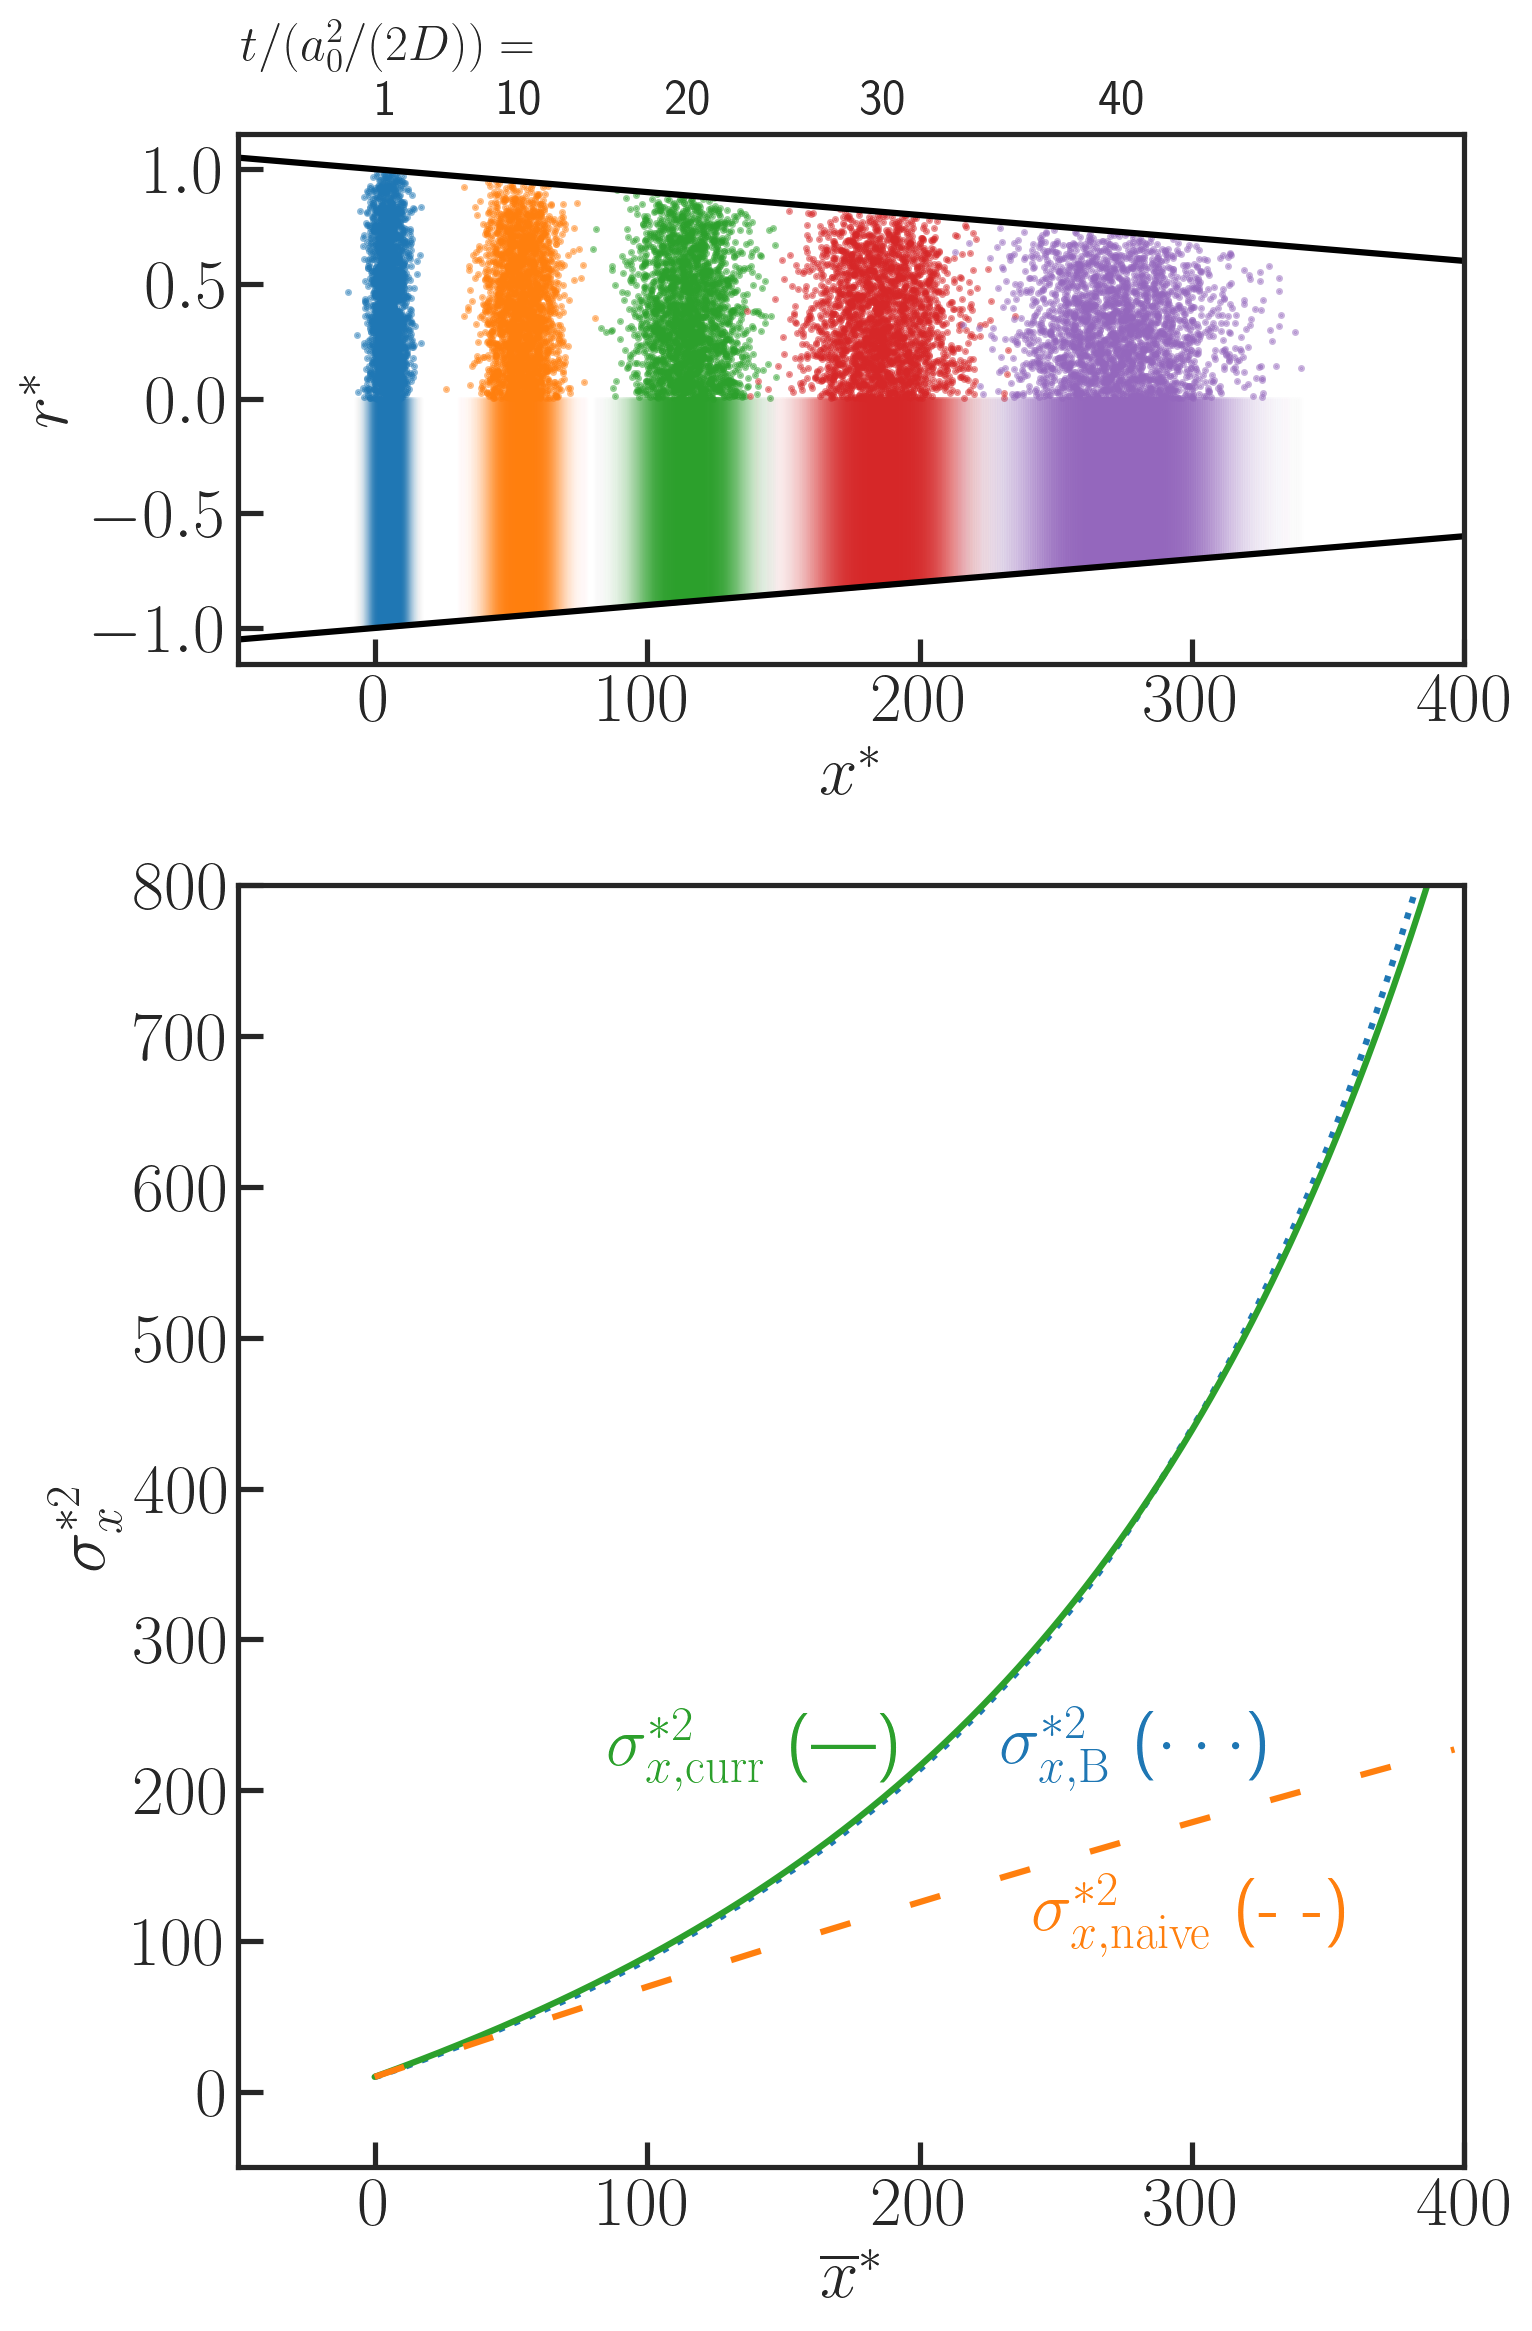

In [14]:
%matplotlib inline
sns.set_context('talk')
sns.set_style('ticks')
fig = plt.figure(dpi = 200, figsize = (8,12))
gs = GridSpec(nrows=3, ncols=1)

ax0 = fig.add_subplot(gs[0, 0])

name_head = 'result_r_Pe0_10_beta_-0.001_initVar10_seed_'
func_x = lambda x : 1 - 0.001*x
result = pickle.load(open(output_path+name_head+str(0), 'rb'))
plt.plot(np.linspace(-50,400,1000), func_x(np.linspace(-50,400,1000)), color = 'black')
plt.plot(np.linspace(-50,400,1000), -func_x(np.linspace(-50,400,1000)), color = 'black')

j_range = [20, 200, 400, 600, 800]
cmap_list = ['Greys', 'Blues', 'Oranges', 'Greens', 'Reds', 'Purples']

for m, j2 in enumerate(j_range):
    j = np.nanargmin(np.abs(result['weighted_x'].flatten()[j2] - result['predicted_x_bar']))
    
    X = result['x'][:, j2]
    R = np.copy(result['r'][:, j2])
    R_plot = np.zeros_like(R)
    THETA = result['theta'][:, j2]
    loc_neg = THETA < 0
    R_plot = R[~loc_neg]
    Y = R_plot*np.sin(THETA[~loc_neg])
    X_plot = X[~loc_neg]
    plt.scatter(X_plot, Y, s = 1, alpha = 0.5, label = r'$t=$'+ '{:.1f}'.format(result['T'][j2]/(result['a0']**2/(2*result['D']))) + r'$a_0^2/(2D)$')
     
    xmin = np.min(X_plot)
    xmax = np.max(X_plot)
    i_plot = 200
    x_pdf = np.linspace(xmin, xmax, i_plot)
    alpha_all = (norm.pdf(x_pdf, result['predicted_x_bar'][j], 
                             np.sqrt(result['predicted_var_heuristic'][j]))/np.nanmax(norm.pdf(x_pdf, result['predicted_x_bar'][j], 
                                                                                            np.sqrt(result['predicted_var_heuristic'][j])))
                 *np.exp(result['predicted_ln_cdx_heuristic'][j] - result['predicted_ln_cdx_heuristic'][900]))
    for i in range(i_plot-1):
        plt.fill_between(x_pdf[i:i+2], -func_x(x_pdf[i:i+2]), color = 'C'+str(m), alpha = alpha_all[i])
    
    if m == 0:
        plt.text(result['predicted_x_bar'][j], 1.2, r'$t/(a_0^2/(2D))=$'+ '\n{:.0f}'.format(result['T'][j2]/(result['a0']**2/(2*result['D']))), horizontalalignment='center', verticalalignment='bottom')
    else:
        plt.text(result['predicted_x_bar'][j], 1.2, '{:.0f}'.format(result['T'][j2]/(result['a0']**2/(2*result['D']))), horizontalalignment='center', verticalalignment='bottom')
    
plt.xlim([-50, 400])
plt.xlabel(r'$x^*$', fontsize = 25)
plt.ylabel(r'$r^*$', fontsize = 25)
ax0.tick_params(axis='both', direction = 'in')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

ax1 = fig.add_subplot(gs[1:3, 0])
weighted_x_mean = []
weighted_var_mean = []
predicted_x_bar_mean = []
predicted_var_mean = []
predicted_var_naive_mean = []
for i in range(5):
    result = pickle.load(open(output_path+name_head+str(i)+'_summarized', 'rb'))
    weighted_x_mean.append(result['weighted_x'].flatten())
    weighted_var_mean.append(result['weighted_var'].flatten())
    predicted_x_bar_mean.append(result['predicted_x_bar'])
    predicted_var_mean.append(result['predicted_var_heuristic'])
    predicted_var_naive_mean.append(result['predicted_var'])
weighted_x_mean = np.mean(np.vstack(weighted_x_mean), axis = 0)
weighted_var_mean = np.mean(np.vstack(weighted_var_mean), axis = 0)
predicted_x_bar_mean = np.mean(np.vstack(predicted_x_bar_mean), axis = 0)
predicted_var_mean = np.mean(np.vstack(predicted_var_mean), axis = 0)
predicted_var_naive_mean = np.mean(np.vstack(predicted_var_naive_mean), axis = 0)
plt.plot(weighted_x_mean, weighted_var_mean, label = r'$\sigma^2_{x, \mathrm{B}}\enspace$'+': Brownian prediction', color = 'C0', linestyle = 'dotted')
plt.plot(predicted_x_bar_mean, predicted_var_mean, label = r'$\sigma^2_{x, \mathrm{curr}}$'+': current model', color = 'C2', alpha = 1)
plt.plot(predicted_x_bar_mean, predicted_var_naive_mean, label = r'$\sigma^2_{x, \mathrm{naive}}$'+': naive', color = 'C1', alpha = 1, linestyle = (0,(5,10)))
plt.xlabel(r'$\overline{x}^*$', fontsize = 25)
plt.ylabel(r'$\sigma^{*2}_x$', fontsize = 25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
ax1.tick_params(axis='both', direction = 'in')
plt.text(140, 200, r'$\sigma^{*2}_{x, \mathrm{curr}}$'+' (—)', color = 'C2', fontsize = 25, horizontalalignment='center', verticalalignment='bottom')
plt.text(280, 200, r'$\sigma^{*2}_{x, \mathrm{B}}$'+r' ($\cdot\cdot\cdot$)', color = 'C0', fontsize = 25, horizontalalignment='center', verticalalignment='bottom')
plt.text(300, 90, r'$\sigma^{*2}_{x, \mathrm{naive}}$'+r' (- -)', color = 'C1', fontsize = 25, horizontalalignment='center', verticalalignment='bottom')
plt.xlim([-50, 400])
plt.ylim([-50, 800])

plt.tight_layout()
plt.savefig('Fig_converg_initVar_highRes.png', dpi = 400, bbox_inches = "tight")
plt.savefig('Fig_converg_initVar_lowRes.png', dpi = 150, bbox_inches = "tight")

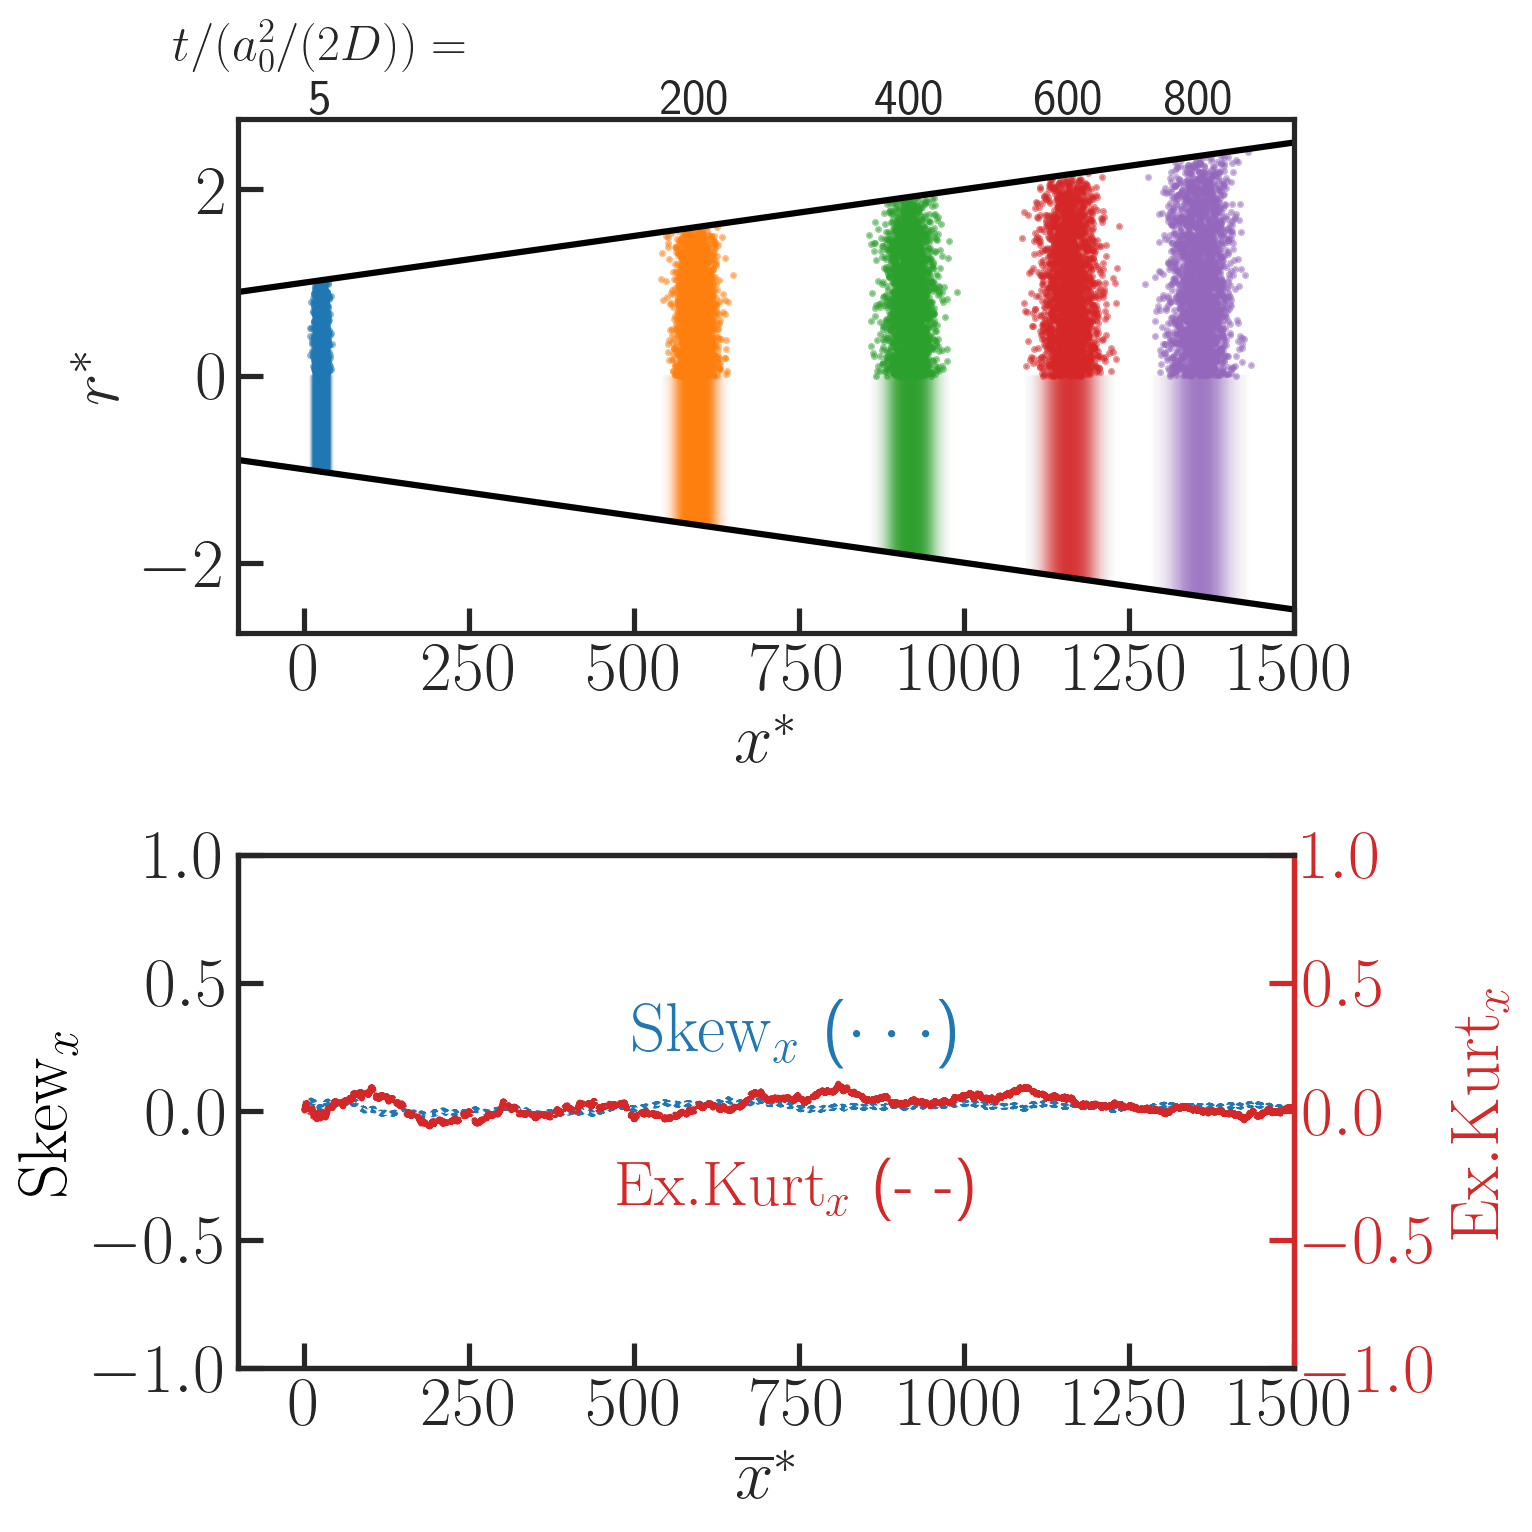

In [52]:
%matplotlib inline
sns.set_context('talk')
sns.set_style('ticks')
fig = plt.figure(dpi = 200, figsize = (8,8))
gs = GridSpec(nrows=2, ncols=1)

ax0 = fig.add_subplot(gs[0, 0])

name_head = 'result_r_Pe0_10_beta_0.001_initVar10_seed_'
func_x = lambda x : 1 + 0.001*x
result = pickle.load(open(output_path+name_head+str(0), 'rb'))
plt.plot(np.linspace(-100,1500,1000), func_x(np.linspace(-100,1500,1000)), color = 'black')
plt.plot(np.linspace(-100,1500,1000), -func_x(np.linspace(-100,1500,1000)), color = 'black')

#j_range = [10, 500, 1000, 2000, 3000, 4000]
j_range = [100, 4000, 8000, 12000, 16000]
cmap_list = ['Greys', 'Blues', 'Oranges', 'Greens', 'Reds', 'Purples']

for m, j2 in enumerate(j_range):
    j = np.argmin(np.abs(result['weighted_x'].flatten()[j2] - result['predicted_x_bar']))
    
    X = result['x'][:, j2]
    R = np.copy(result['r'][:, j2])
    R_plot = np.zeros_like(R)
    THETA = result['theta'][:, j2]
    loc_neg = THETA < 0
    R_plot = R[~loc_neg]
    Y = R_plot*np.sin(THETA[~loc_neg])
    X_plot = X[~loc_neg]
    plt.scatter(X_plot, Y, s = 1, alpha = 0.5, label = r'$t=$'+ '{:.1f}'.format(result['T'][j2]/(result['a0']**2/(2*result['D']))) + r'$a_0^2/(2D)$')
     
    xmin = np.min(X_plot)
    xmax = np.max(X_plot)
    i_plot = 200
    x_pdf = np.linspace(xmin, xmax, i_plot)
    alpha_all = (norm.pdf(x_pdf, result['predicted_x_bar'][j], 
                             np.sqrt(result['predicted_var_heuristic'][j]))/np.max(norm.pdf(x_pdf, result['predicted_x_bar'][j], 
                                                                                            np.sqrt(result['predicted_var_heuristic'][j])))
                 *np.exp(result['predicted_ln_cdx_heuristic'][j] - np.max(result['predicted_ln_cdx_heuristic'])))
    for i in range(i_plot-1):
        plt.fill_between(x_pdf[i:i+2], -func_x(x_pdf[i:i+2]), color = 'C'+str(m), alpha = alpha_all[i])
    
    if m == 0:
        plt.text(result['predicted_x_bar'][j], 2.7, 
                 r'$t/(a_0^2/(2D))=$'+ '\n{:.0f}'.format(result['T'][j2]/(result['a0']**2/(2*result['D']))), 
                 horizontalalignment='center', verticalalignment='bottom')
    else:
        plt.text(result['predicted_x_bar'][j], 2.7, 
                 '{:.0f}'.format(result['T'][j2]/(result['a0']**2/(2*result['D']))), 
                 horizontalalignment='center', verticalalignment='bottom')
    
plt.xlim([-100, 1500])
plt.xlabel(r'$x^*$', fontsize = 25)
plt.ylabel(r'$r^*$', fontsize = 25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
ax0.tick_params(axis='both', direction = 'in')

#plt.subplot(2,1,2)
ax1 = fig.add_subplot(gs[1, 0])
weighted_x_mean = []
weighted_var_mean = []
weighted_skewness_mean = []
weighted_kurtosis_mean = []
for i in range(5):
    result = pickle.load(open(output_path+name_head+str(i)+'_summarized', 'rb'))
    weighted_x_mean.append(result['weighted_x'].flatten())
    weighted_var_mean.append(result['weighted_var'].flatten())
    weighted_skewness_mean.append(result['weighted_skewness'].flatten())
    weighted_kurtosis_mean.append(result['weighted_kurtosis'].flatten())
weighted_x_mean = np.mean(np.vstack(weighted_x_mean), axis = 0)
weighted_var_mean = np.mean(np.vstack(weighted_var_mean), axis = 0)
weighted_skewness_mean = np.mean(np.vstack(weighted_skewness_mean), axis = 0)
weighted_kurtosis_mean = np.mean(np.vstack(weighted_kurtosis_mean), axis = 0)

plt.plot(weighted_x_mean, weighted_skewness_mean, label = r'$\mathrm{Skew}_{x, \mathrm{B}}\enspace$'+': Brownian prediction', color = 'C0', linestyle = 'dotted')
plt.xlabel(r'$\overline{x}^*$', fontsize = 25)
plt.ylabel(r'$\mathrm{Skew}_x$', fontsize = 25, color = 'black')
plt.text(750, 0.3, r'$\mathrm{Skew}_x$'+r' ($\cdot\cdot\cdot$)', color = 'C0', fontsize = 25, horizontalalignment='center', verticalalignment='center')
plt.ylim([-1, 1])
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
ax1.tick_params(axis='both', direction = 'in')

ax2 = ax1.twinx()
alt_color = 'C3'
ax2.plot(weighted_x_mean, weighted_kurtosis_mean - 3, alt_color, linestyle = 'dashed')
ax2.set_ylabel(r'$\mathrm{Ex. Kurt}_x$', color=alt_color, fontsize = 25)
ax2.set_ylim([-1,1])
ax2.set_yticks([-1, -0.5, 0, 0.5, 1])
ax2.tick_params(axis='y', color=alt_color, labelcolor=alt_color, labelsize = 25, direction = 'in')
ax2.spines['right'].set_color(alt_color)
ax2.grid(False)
plt.text(750, -0.3, r'$\mathrm{Ex. Kurt}_x$'+' (- -)', color = 'C3', fontsize = 23, horizontalalignment='center', verticalalignment='center')

plt.xlim([-100, 1500])
plt.tight_layout()
plt.savefig('Fig_diverg_skewKurt_initVar_highRes.png', dpi = 400, bbox_inches = "tight")
plt.savefig('Fig_diverg_skewKurt_initVar_lowRes.png', dpi = 150, bbox_inches = "tight")

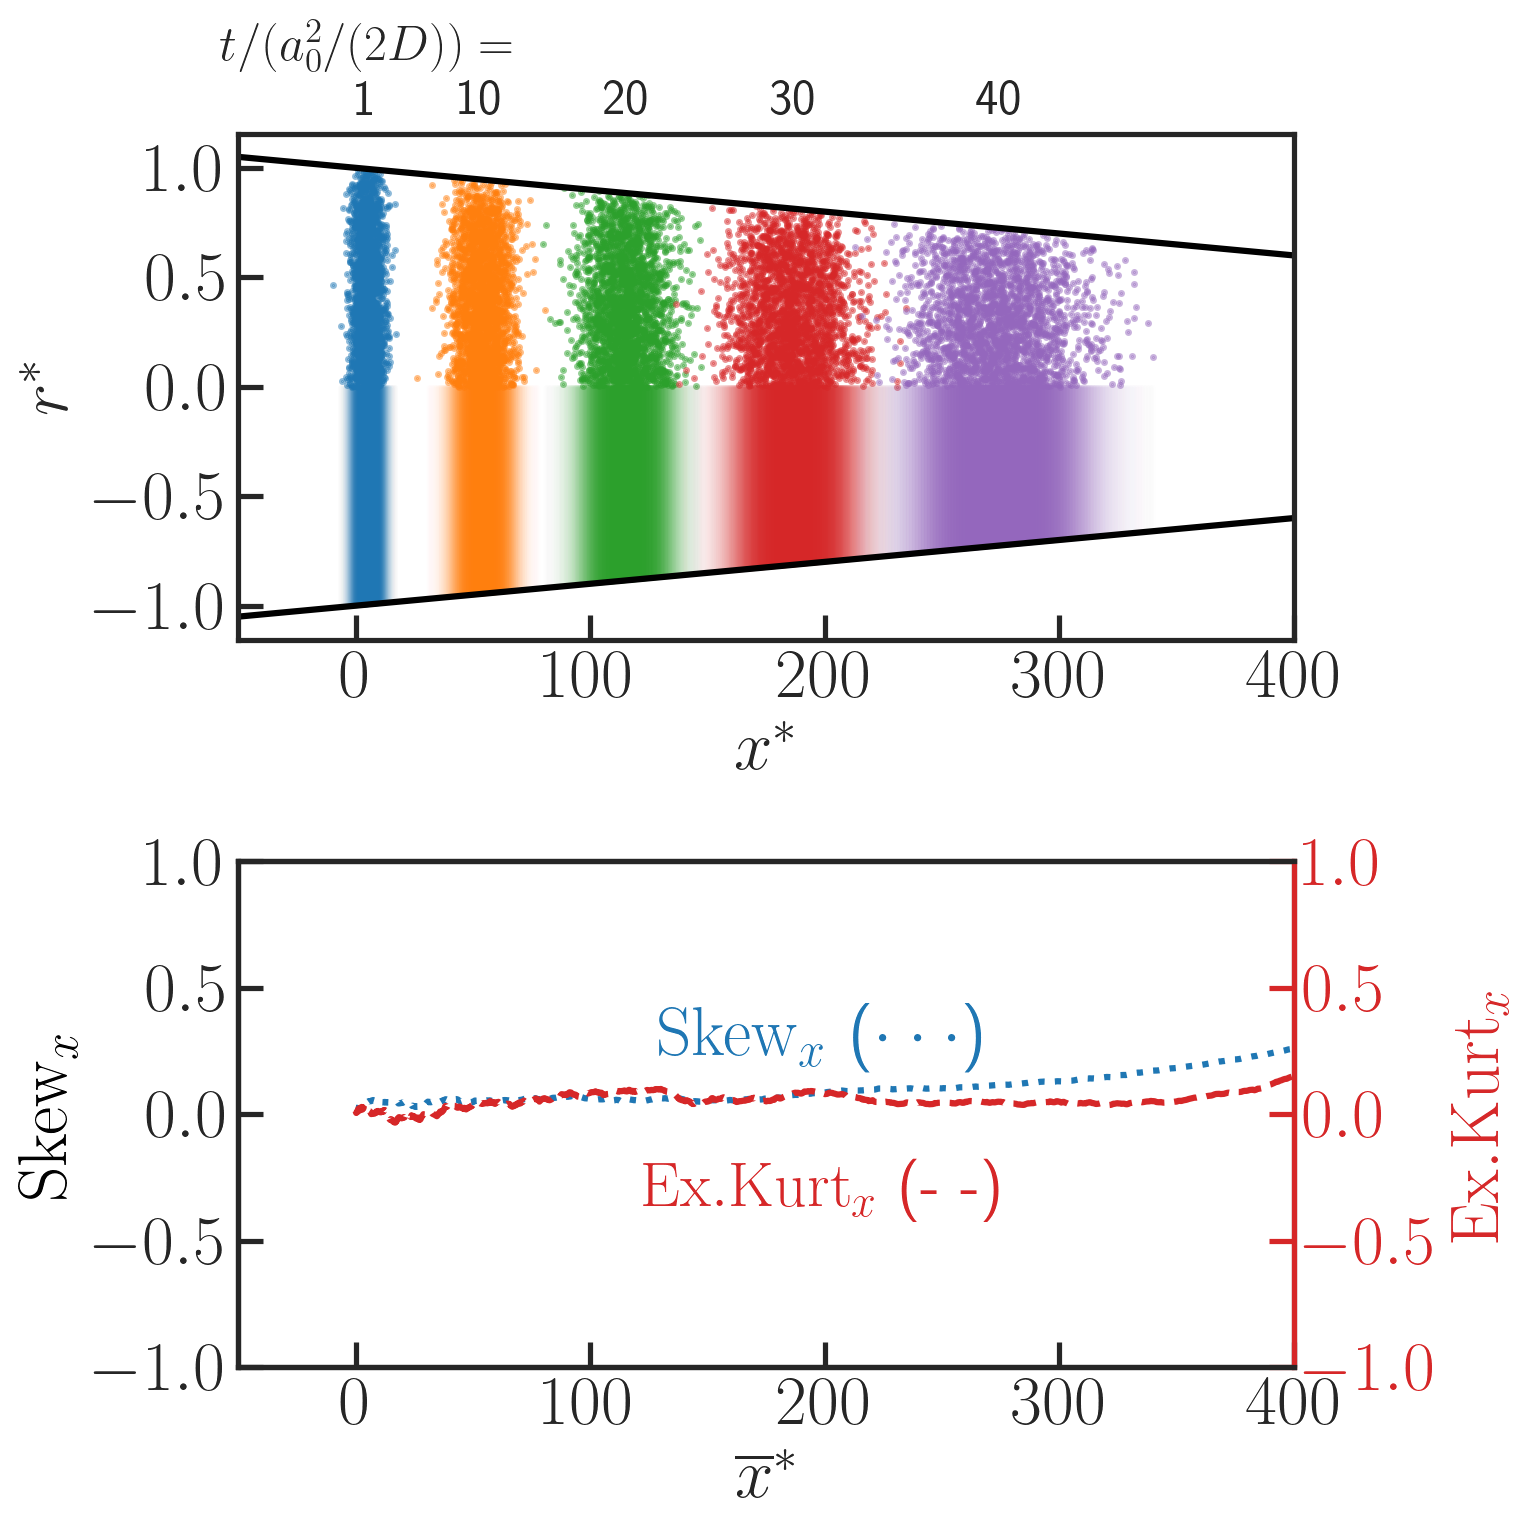

In [35]:
sns.set_context('talk')
sns.set_style('ticks')
fig = plt.figure(dpi = 200, figsize = (8,8))
gs = GridSpec(nrows=2, ncols=1)

ax0 = fig.add_subplot(gs[0, 0])
#ax0.plot(time, height)
#plt.subplot(2,1,1)

name_head = 'result_r_Pe0_10_beta_-0.001_initVar10_seed_'
func_x = lambda x : 1 - 0.001*x
result = pickle.load(open(output_path+name_head+str(0), 'rb'))
plt.plot(np.linspace(-50,400,1000), func_x(np.linspace(-50,400,1000)), color = 'black')
plt.plot(np.linspace(-50,400,1000), -func_x(np.linspace(-50,400,1000)), color = 'black')

#j_range = [10, 500, 1000, 2000, 3000, 4000]
j_range = [20, 200, 400, 600, 800]
cmap_list = ['Greys', 'Blues', 'Oranges', 'Greens', 'Reds', 'Purples']

for m, j2 in enumerate(j_range):
    j = np.nanargmin(np.abs(result['weighted_x'].flatten()[j2] - result['predicted_x_bar']))
    
    X = result['x'][:, j2]
    R = np.copy(result['r'][:, j2])
    R_plot = np.zeros_like(R)
    THETA = result['theta'][:, j2]
    loc_neg = THETA < 0
    R_plot = R[~loc_neg]
    Y = R_plot*np.sin(THETA[~loc_neg])
    X_plot = X[~loc_neg]
    plt.scatter(X_plot, Y, s = 1, alpha = 0.5, label = r'$t=$'+ '{:.1f}'.format(result['T'][j2]/(result['a0']**2/(2*result['D']))) + r'$a_0^2/(2D)$')
     
    xmin = np.min(X_plot)
    xmax = np.max(X_plot)
    i_plot = 200
    x_pdf = np.linspace(xmin, xmax, i_plot)
    alpha_all = (norm.pdf(x_pdf, result['predicted_x_bar'][j], 
                             np.sqrt(result['predicted_var_heuristic'][j]))/np.nanmax(norm.pdf(x_pdf, result['predicted_x_bar'][j], 
                                                                                            np.sqrt(result['predicted_var_heuristic'][j])))
                 *np.exp(result['predicted_ln_cdx_heuristic'][j] - result['predicted_ln_cdx_heuristic'][900]))
    for i in range(i_plot-1):
        plt.fill_between(x_pdf[i:i+2], -func_x(x_pdf[i:i+2]), color = 'C'+str(m), alpha = alpha_all[i])
    
    if m == 0:
        plt.text(result['predicted_x_bar'][j], 1.2, r'$t/(a_0^2/(2D))=$'+ '\n{:.0f}'.format(result['T'][j2]/(result['a0']**2/(2*result['D']))), horizontalalignment='center', verticalalignment='bottom')
    else:
        plt.text(result['predicted_x_bar'][j], 1.2, '{:.0f}'.format(result['T'][j2]/(result['a0']**2/(2*result['D']))), horizontalalignment='center', verticalalignment='bottom')
    
plt.xlim([-50, 400])
plt.xlabel(r'$x^*$', fontsize = 25)
plt.ylabel(r'$r^*$', fontsize = 25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
ax0.tick_params(axis='both', direction = 'in')

#plt.subplot(2,1,2)
ax1 = fig.add_subplot(gs[1, 0])
weighted_x_mean = []
weighted_var_mean = []
weighted_skewness_mean = []
weighted_kurtosis_mean = []
for i in range(5):
    result = pickle.load(open(output_path+name_head+str(i)+'_summarized', 'rb'))
    weighted_x_mean.append(result['weighted_x'].flatten())
    weighted_var_mean.append(result['weighted_var'].flatten())
    weighted_skewness_mean.append(result['weighted_skewness'].flatten())
    weighted_kurtosis_mean.append(result['weighted_kurtosis'].flatten())
weighted_x_mean = np.mean(np.vstack(weighted_x_mean), axis = 0)
weighted_var_mean = np.mean(np.vstack(weighted_var_mean), axis = 0)
weighted_skewness_mean = np.mean(np.vstack(weighted_skewness_mean), axis = 0)
weighted_kurtosis_mean = np.mean(np.vstack(weighted_kurtosis_mean), axis = 0)

plt.plot(weighted_x_mean, weighted_skewness_mean, label = r'$\mathrm{Skew}_{x, \mathrm{B}}\enspace$'+': Brownian prediction', color = 'C0', linestyle = 'dotted')
plt.xlabel(r'$\overline{x}^*$', fontsize = 25)
plt.ylabel(r'$\mathrm{Skew}_x$', fontsize = 25, color = 'black')
plt.text(200, 0.3, r'$\mathrm{Skew}_x$'+r' ($\cdot\cdot\cdot$)', color = 'C0', fontsize = 25, horizontalalignment='center', verticalalignment='center')
plt.ylim([-1, 1])
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
ax1.tick_params(axis='both', direction = 'in')

ax2 = ax1.twinx()
alt_color = 'C3'
ax2.plot(weighted_x_mean, weighted_kurtosis_mean - 3, alt_color, linestyle = 'dashed')
ax2.set_ylabel(r'$\mathrm{Ex. Kurt}_x$', color=alt_color, fontsize = 25)
ax2.set_yticks([-1, -0.5, 0, 0.5, 1])
ax2.set_ylim([-1,1])
ax2.tick_params(axis='y', color=alt_color, labelcolor=alt_color, labelsize = 25, direction = 'in')
ax2.spines['right'].set_color(alt_color)
ax2.grid(False)
plt.text(200, -0.3, r'$\mathrm{Ex. Kurt}_x$'+' (- -)', color = 'C3', fontsize = 23, horizontalalignment='center', verticalalignment='center')

plt.xlim([-50, 400])
plt.tight_layout()
plt.savefig('Fig_converg_skewKurt_initVar_highRes.png', dpi = 400, bbox_inches = "tight")
plt.savefig('Fig_converg_skewKurt_initVar_lowRes.png', dpi = 150, bbox_inches = "tight")

## Figure 4 & S2 -- sinusoidal

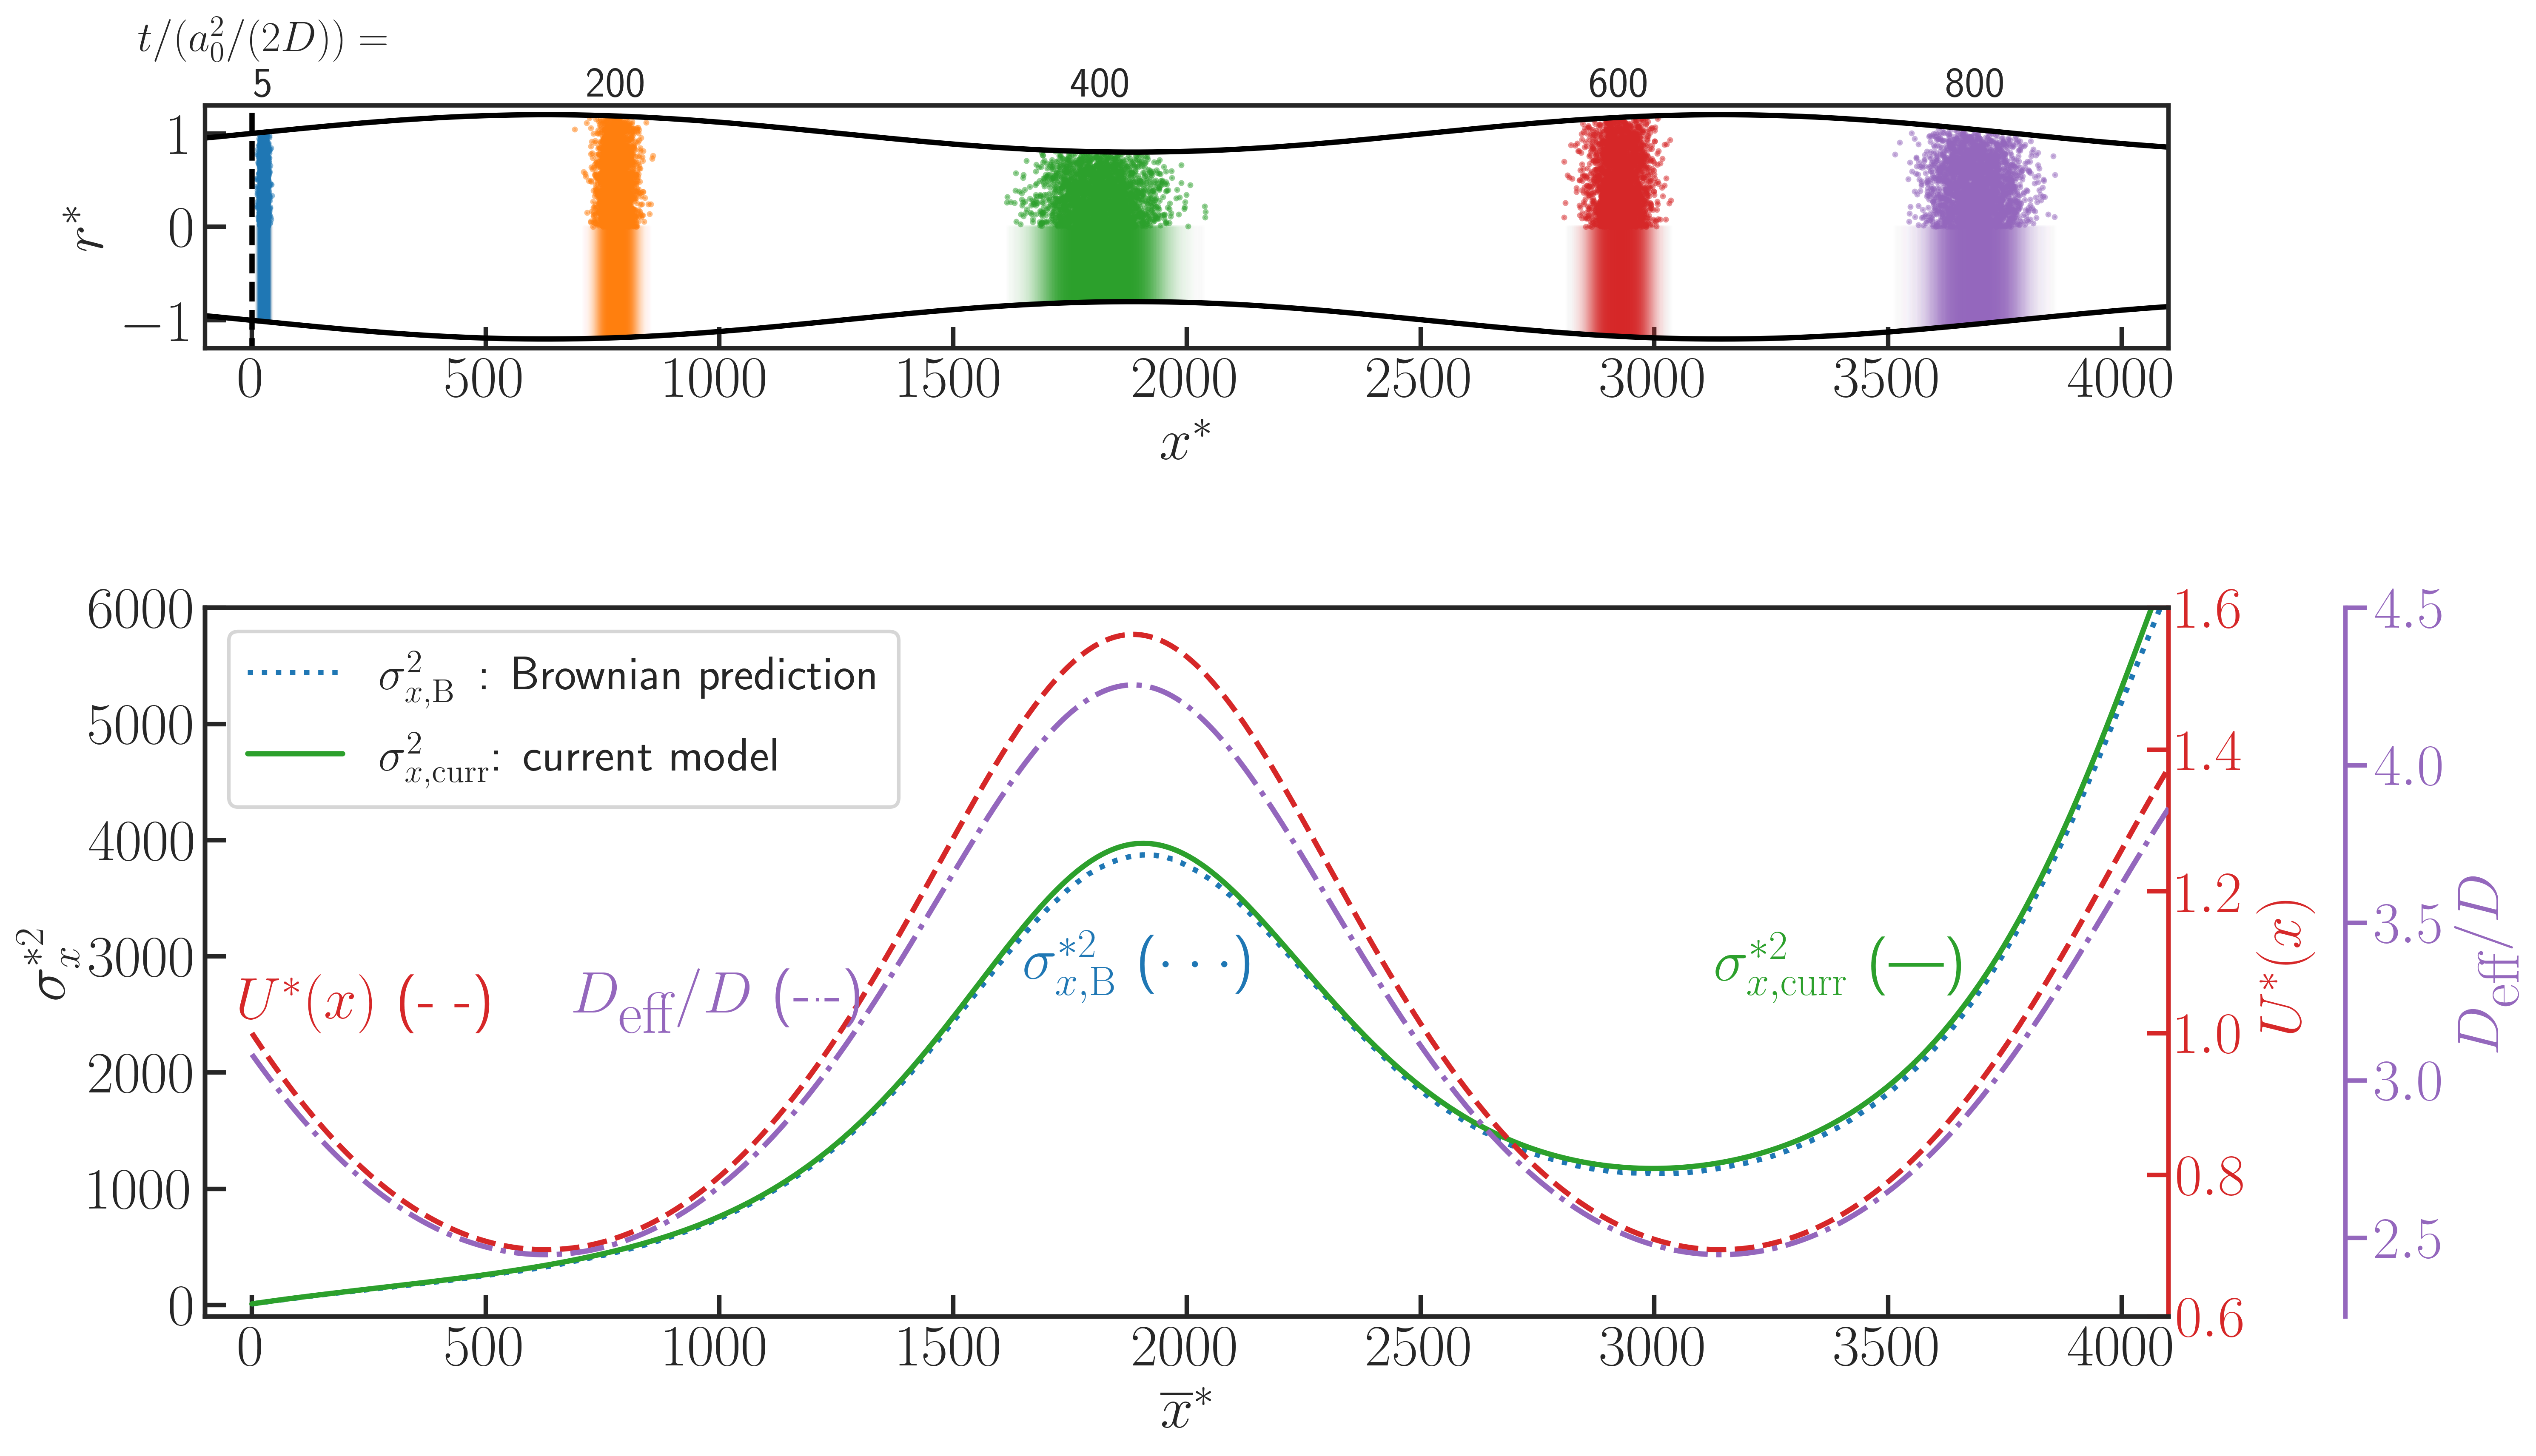

In [58]:
sns.set_context('talk')
sns.set_style('ticks')
name_head = 'result_periodic2_Pe0_10_initVar10_seed_'
func_x = lambda x: 1+0.2*np.sin(x/400)

#plt.figure(dpi = 400, figsize = (20,13))
plt.figure(dpi = 400, figsize = (15,9.75))
plt.subplot(2,1,1)
result = pickle.load(open(output_path+name_head+str(0), 'rb'))
plt.plot(np.linspace(-100,0,200), func_x(np.linspace(-100,0,200)), color = 'black')
plt.plot(np.linspace(-100,0,200), -func_x(np.linspace(-100,0,200)), color = 'black')
plt.plot(result['x_range'][0:18000], func_x(result['x_range'][0:18000]), color = 'black')
plt.plot(result['x_range'][0:18000], -func_x(result['x_range'][0:18000]), color = 'black')

j_range = [100, 4000, 8000, 12000, 16000]
cmap_list = ['Greys', 'Blues', 'Oranges', 'Greens', 'Reds', 'Purples']

for m, j2 in enumerate(j_range):
    j = np.argmin(np.abs(result['weighted_x'].flatten()[j2] - result['predicted_x_bar']))
    
    X = result['x'][:, j2]
    R = np.copy(result['r'][:, j2])
    R_plot = np.zeros_like(R)
    THETA = result['theta'][:, j2]
    loc_neg = THETA < 0
    R_plot = R[~loc_neg]
    Y = R_plot*np.sin(THETA[~loc_neg])
    X_plot = X[~loc_neg]
    plt.scatter(X_plot, Y, s = 1, alpha = 0.5, label = r'$t=$'+ '{:.1f}'.format(result['T'][j2]/(result['a0']**2/(2*result['D']))) + r'$a_0^2/(2D)$')
    
    #X = result['x'][:, j]
    #R = np.copy(result['r'][:, j])
    #plt.scatter(X, -R, s = 1, label = r'$t=$'+ '{:.1f}'.format(result['T'][j]/(result['a0']**2/(2*result['D']))) + r'$a_0^2/(2D)$', alpha = 0.25)
    
    xmin = np.min(X_plot)
    xmax = np.max(X_plot)
    i_plot = 200
    x_pdf = np.linspace(xmin, xmax, i_plot)
    alpha_all = (norm.pdf(x_pdf, result['predicted_x_bar'][j], 
                             np.sqrt(result['predicted_var_heuristic'][j]))/np.max(norm.pdf(x_pdf, result['predicted_x_bar'][j], 
                                                                                            np.sqrt(result['predicted_var_heuristic'][j])))
                 *np.exp(result['predicted_ln_cdx_heuristic'][j] - np.max(result['predicted_ln_cdx_heuristic'])))
    for i in range(i_plot-1):
        plt.fill_between(x_pdf[i:i+2], -func_x(x_pdf[i:i+2]), color = 'C'+str(m), alpha = alpha_all[i])
    
    if m == 0:
        plt.text(result['predicted_x_bar'][j], 1.3, r'$t/(a_0^2/(2D))=$'+ '\n{:.0f}'.format(result['T'][j2]/(result['a0']**2/(2*result['D']))), horizontalalignment='center', verticalalignment='bottom')
    else:
        plt.text(result['predicted_x_bar'][j], 1.3, '{:.0f}'.format(result['T'][j2]/(result['a0']**2/(2*result['D']))), horizontalalignment='center', verticalalignment='bottom')
    
# Define hexbin grid extent
xmin = np.min(result['x_range'][0:18000])-20
xmax = np.max(result['x_range'][0:18000])
ymin = -np.max(func_x(result['x_range'][0:18000]))
ymax = 0
plt.vlines(0, ymin-0.2, -ymin+0.2, color = 'black', linestyle = 'dashed')
plt.gca().tick_params(axis='both', direction = 'in')
ext = (xmin, xmax, ymin, ymax)
plt.xlim([-100, 4100])
plt.ylim([ymin-0.1, -ymin+0.1])
plt.xlabel(r'$x^*$', fontsize = 25)
plt.ylabel(r'$r^*$', fontsize = 25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
#plt.text()
plt.gca().set(aspect=200)

plt.subplot(2,1,2)
weighted_x_mean = []
weighted_var_mean = []
predicted_x_bar_mean = []
predicted_var_mean = []
for i in range(5):
    result = pickle.load(open(output_path+name_head+str(i)+'_summarized', 'rb'))
    weighted_x_mean.append(result['weighted_x'].flatten())
    weighted_var_mean.append(result['weighted_var'].flatten())
    predicted_x_bar_mean.append(result['predicted_x_bar'])
    predicted_var_mean.append(result['predicted_var_heuristic'])
weighted_x_mean = np.mean(np.vstack(weighted_x_mean), axis = 0)
weighted_var_mean = np.mean(np.vstack(weighted_var_mean), axis = 0)
predicted_x_bar_mean = np.mean(np.vstack(predicted_x_bar_mean), axis = 0)
predicted_var_mean = np.mean(np.vstack(predicted_var_mean), axis = 0)
plt.plot(weighted_x_mean, weighted_var_mean, label = r'$\sigma^2_{x, \mathrm{B}}\enspace$'+': Brownian prediction', color = 'C0', linestyle = 'dotted')
plt.plot(predicted_x_bar_mean, predicted_var_mean, label = r'$\sigma^2_{x, \mathrm{curr}}$'+': current model', color = 'C2', alpha = 1)
plt.xlabel(r'$\overline{x}^*$', fontsize = 25)
plt.ylabel(r'$\sigma^{*2}_x$', fontsize = 25)
plt.ylim([-100, 6000])
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.text(3400, 2600, r'$\sigma^{*2}_{x, \mathrm{curr}}$'+' (—)', color = 'C2', fontsize = 25, horizontalalignment='center', verticalalignment='bottom')
plt.text(1900, 2600, r'$\sigma^{*2}_{x, \mathrm{B}}$'+r' ($\cdot\cdot\cdot$)', color = 'C0', fontsize = 25, horizontalalignment='center', verticalalignment='bottom')

ax1 = plt.gca()
ax1.tick_params(axis='both', direction = 'in')
ax2 = ax1.twinx()
alt_color = 'C3'

a = func_x(predicted_x_bar_mean)
U = result['U0']*result['a0']**2/func_x(predicted_x_bar_mean)**2
beta_of_x = interp1d(result['x_range'], result['beta'], kind='cubic')

ax2.plot(predicted_x_bar_mean, U, alt_color, linestyle = 'dashed')
ax2.set_ylabel(r'$U^{*}(x)$', color=alt_color, fontsize = 25)
ax2.set_yticks([0.6, 0.8, 1.0, 1.2, 1.4, 1.6])
ax2.set_ylim([0.6,1.6])
ax2.tick_params(axis='y', color=alt_color, labelcolor=alt_color, labelsize = 25, direction = 'in')
ax2.spines['right'].set_color(alt_color)
ax2.grid(False)
plt.text(250, 1, r'$U^{*}(x)$'+' (- -)', color = 'C3', fontsize = 25, horizontalalignment='center', verticalalignment='bottom')


twin2 = ax1.twinx()
alt_color2 = 'C4'
twin2.spines.right.set_position(("axes", 1.09))
twin2.plot(predicted_x_bar_mean, 1 + 1/48*U**2*a**2/result['D']**2 - 1/6*U*a/result['D']*beta_of_x(predicted_x_bar_mean) , 
           color=alt_color2, linestyle = 'dashdot')
twin2.set_ylabel(r'$D_{\textrm{eff}}/D$', color = alt_color2, fontsize = 25)
twin2.tick_params(axis = 'y', color = alt_color2, labelcolor = alt_color2, labelsize = 25)
twin2.spines['right'].set_color(alt_color2)
twin2.grid(False)

plt.text(1000, 3.15, r'$D_{\textrm{eff}}/D$'+' (-·-)', color = 'C4', fontsize = 25, horizontalalignment='center', verticalalignment='bottom')

plt.xlim([-100, 4100])
plt.ylim([2.25, 4.5])

ax1.legend(fontsize = 20, loc = 'upper left')
plt.tight_layout()
plt.savefig('Fig_periodic_2_initVar_lowRes.png', dpi = 150)
plt.savefig('Fig_periodic_2_initVar_highRes.png', dpi = 400)

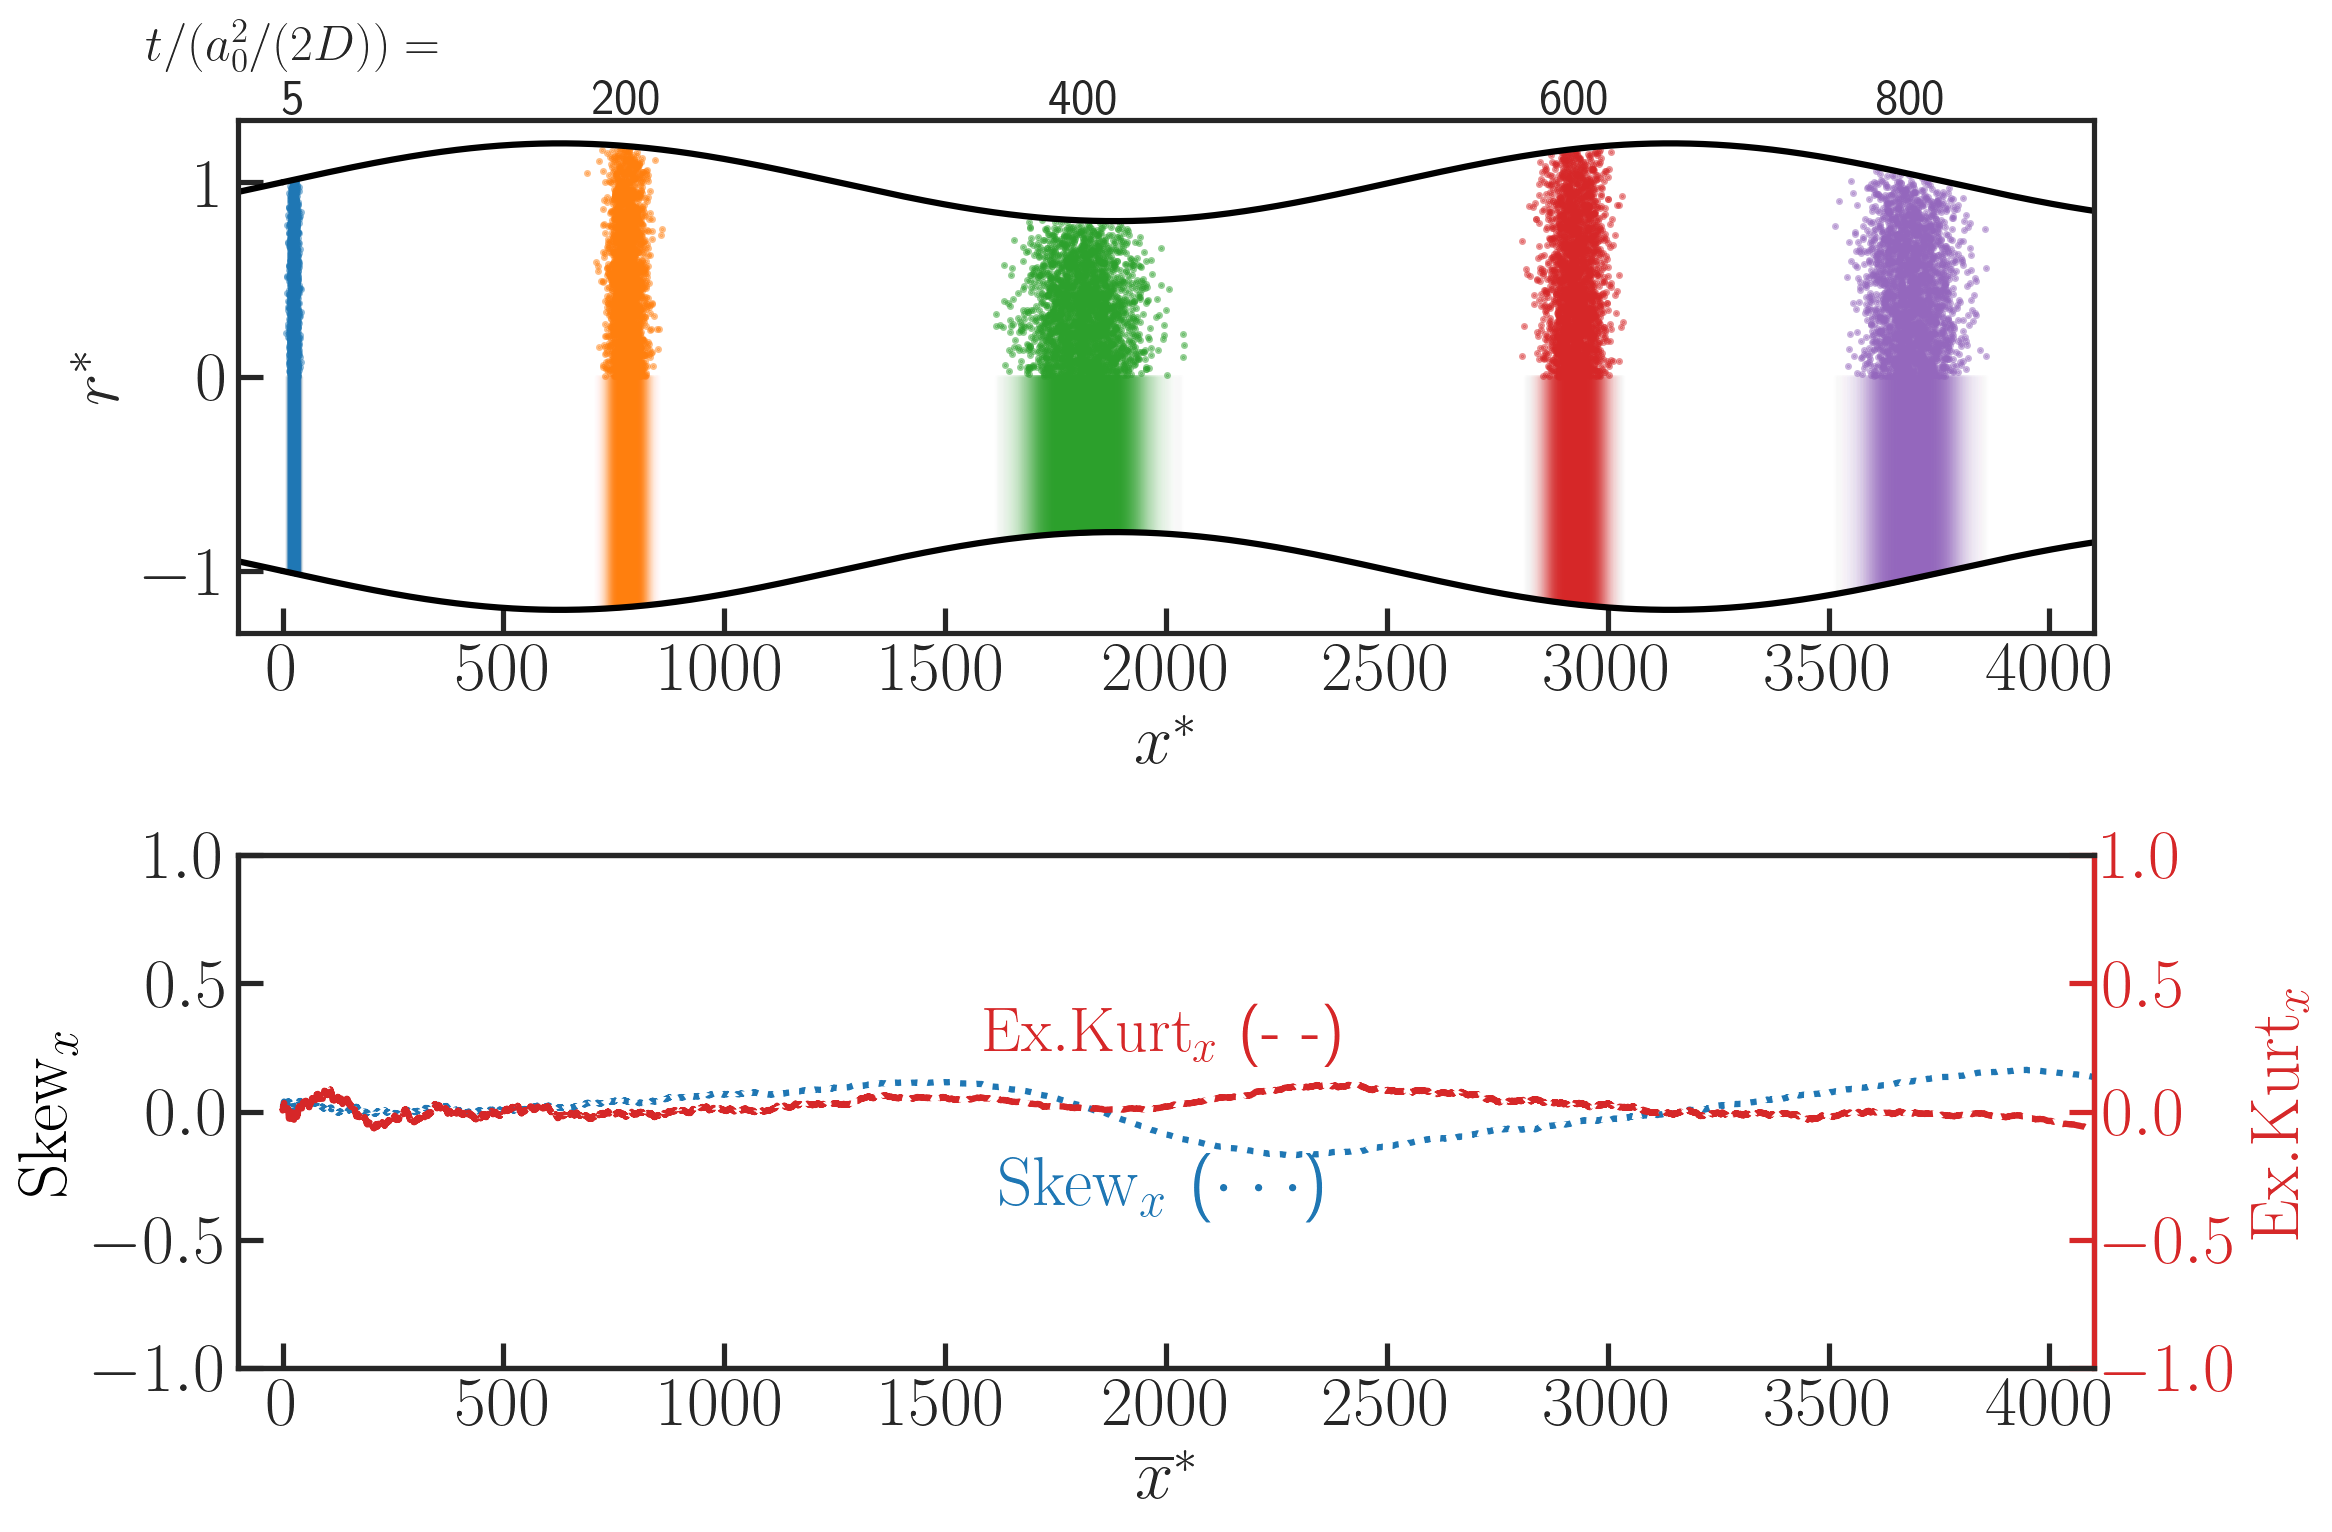

In [33]:
sns.set_context('talk')
sns.set_style('ticks')
fig = plt.figure(dpi = 200, figsize = (12,8))
gs = GridSpec(nrows=2, ncols=1)

ax0 = fig.add_subplot(gs[0, 0])
#ax0.plot(time, height)
#plt.subplot(2,1,1)

name_head = 'result_periodic2_Pe0_10_initVar10_seed_'
func_x = lambda x: 1+0.2*np.sin(x/400)
result = pickle.load(open(output_path+name_head+str(0), 'rb'))
plt.plot(np.linspace(-100,0,200), func_x(np.linspace(-100,0,200)), color = 'black')
plt.plot(np.linspace(-100,0,200), -func_x(np.linspace(-100,0,200)), color = 'black')
plt.plot(result['x_range'][0:18000], func_x(result['x_range'][0:18000]), color = 'black')
plt.plot(result['x_range'][0:18000], -func_x(result['x_range'][0:18000]), color = 'black')

#j_range = [10, 500, 1000, 2000, 3000, 4000]
j_range = [100, 4000, 8000, 12000, 16000]
cmap_list = ['Greys', 'Blues', 'Oranges', 'Greens', 'Reds', 'Purples']

for m, j2 in enumerate(j_range):
    j = np.nanargmin(np.abs(result['weighted_x'].flatten()[j2] - result['predicted_x_bar']))
    
    X = result['x'][:, j2]
    R = np.copy(result['r'][:, j2])
    R_plot = np.zeros_like(R)
    THETA = result['theta'][:, j2]
    loc_neg = THETA < 0
    R_plot = R[~loc_neg]
    Y = R_plot*np.sin(THETA[~loc_neg])
    X_plot = X[~loc_neg]
    plt.scatter(X_plot, Y, s = 1, alpha = 0.5, label = r'$t=$'+ '{:.1f}'.format(result['T'][j2]/(result['a0']**2/(2*result['D']))) + r'$a_0^2/(2D)$')
     
    xmin = np.min(X_plot)
    xmax = np.max(X_plot)
    i_plot = 200
    x_pdf = np.linspace(xmin, xmax, i_plot)
    alpha_all = (norm.pdf(x_pdf, result['predicted_x_bar'][j], 
                             np.sqrt(result['predicted_var_heuristic'][j]))/np.max(norm.pdf(x_pdf, result['predicted_x_bar'][j], 
                                                                                            np.sqrt(result['predicted_var_heuristic'][j])))
                 *np.exp(result['predicted_ln_cdx_heuristic'][j] - np.max(result['predicted_ln_cdx_heuristic'])))
    for i in range(i_plot-1):
        plt.fill_between(x_pdf[i:i+2], -func_x(x_pdf[i:i+2]), color = 'C'+str(m), alpha = alpha_all[i])
    
    if m == 0:
        plt.text(result['predicted_x_bar'][j], 1.3, r'$t/(a_0^2/(2D))=$'+ '\n{:.0f}'.format(result['T'][j2]/(result['a0']**2/(2*result['D']))), horizontalalignment='center', verticalalignment='bottom')
    else:
        plt.text(result['predicted_x_bar'][j], 1.3, '{:.0f}'.format(result['T'][j2]/(result['a0']**2/(2*result['D']))), horizontalalignment='center', verticalalignment='bottom')
    
plt.xlim([-100, 4100])
plt.xlabel(r'$x^*$', fontsize = 25)
plt.ylabel(r'$r^*$', fontsize = 25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
ax0.tick_params(axis='both', direction = 'in')

#plt.subplot(2,1,2)
ax1 = fig.add_subplot(gs[1, 0])
weighted_x_mean = []
weighted_var_mean = []
weighted_skewness_mean = []
weighted_kurtosis_mean = []
for i in range(5):
    result = pickle.load(open(output_path+name_head+str(i)+'_summarized', 'rb'))
    weighted_x_mean.append(result['weighted_x'].flatten())
    weighted_var_mean.append(result['weighted_var'].flatten())
    weighted_skewness_mean.append(result['weighted_skewness'].flatten())
    weighted_kurtosis_mean.append(result['weighted_kurtosis'].flatten())
weighted_x_mean = np.mean(np.vstack(weighted_x_mean), axis = 0)
weighted_var_mean = np.mean(np.vstack(weighted_var_mean), axis = 0)
weighted_skewness_mean = np.mean(np.vstack(weighted_skewness_mean), axis = 0)
weighted_kurtosis_mean = np.mean(np.vstack(weighted_kurtosis_mean), axis = 0)

plt.plot(weighted_x_mean, weighted_skewness_mean, label = r'$\mathrm{Skew}_{x, \mathrm{B}}\enspace$'+': Brownian prediction', color = 'C0', linestyle = 'dotted')
plt.xlabel(r'$\overline{x}^*$', fontsize = 25)
plt.ylabel(r'$\mathrm{Skew}_x$', fontsize = 25, color = 'black')
plt.text(2000, -0.3, r'$\mathrm{Skew}_x$'+r' ($\cdot\cdot\cdot$)', color = 'C0', fontsize = 25, horizontalalignment='center', verticalalignment='center')
plt.ylim([-1, 1])
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
ax1.tick_params(axis='both', direction = 'in')

ax2 = ax1.twinx()
alt_color = 'C3'
ax2.plot(weighted_x_mean, weighted_kurtosis_mean - 3, alt_color, linestyle = 'dashed')
ax2.set_ylabel(r'$\mathrm{Ex. Kurt}_x$', color=alt_color, fontsize = 25)
ax2.set_yticks([-1, -0.5, 0, 0.5, 1])
ax2.set_ylim([-1,1])
ax2.tick_params(axis='y', color=alt_color, labelcolor=alt_color, labelsize = 25, direction = 'in')
ax2.spines['right'].set_color(alt_color)
ax2.grid(False)
plt.text(2000, 0.3, r'$\mathrm{Ex. Kurt}_x$'+' (- -)', color = 'C3', fontsize = 23, horizontalalignment='center', verticalalignment='center')

plt.xlim([-100, 4100])
plt.tight_layout()
plt.savefig('Fig_periodic_skewKurt_initVar_highRes.png', dpi = 400, bbox_inches = "tight")
plt.savefig('Fig_periodic_skewKurt_initVar_lowRes.png', dpi = 150, bbox_inches = "tight")

## Figure 5 -- long-term solute behavior

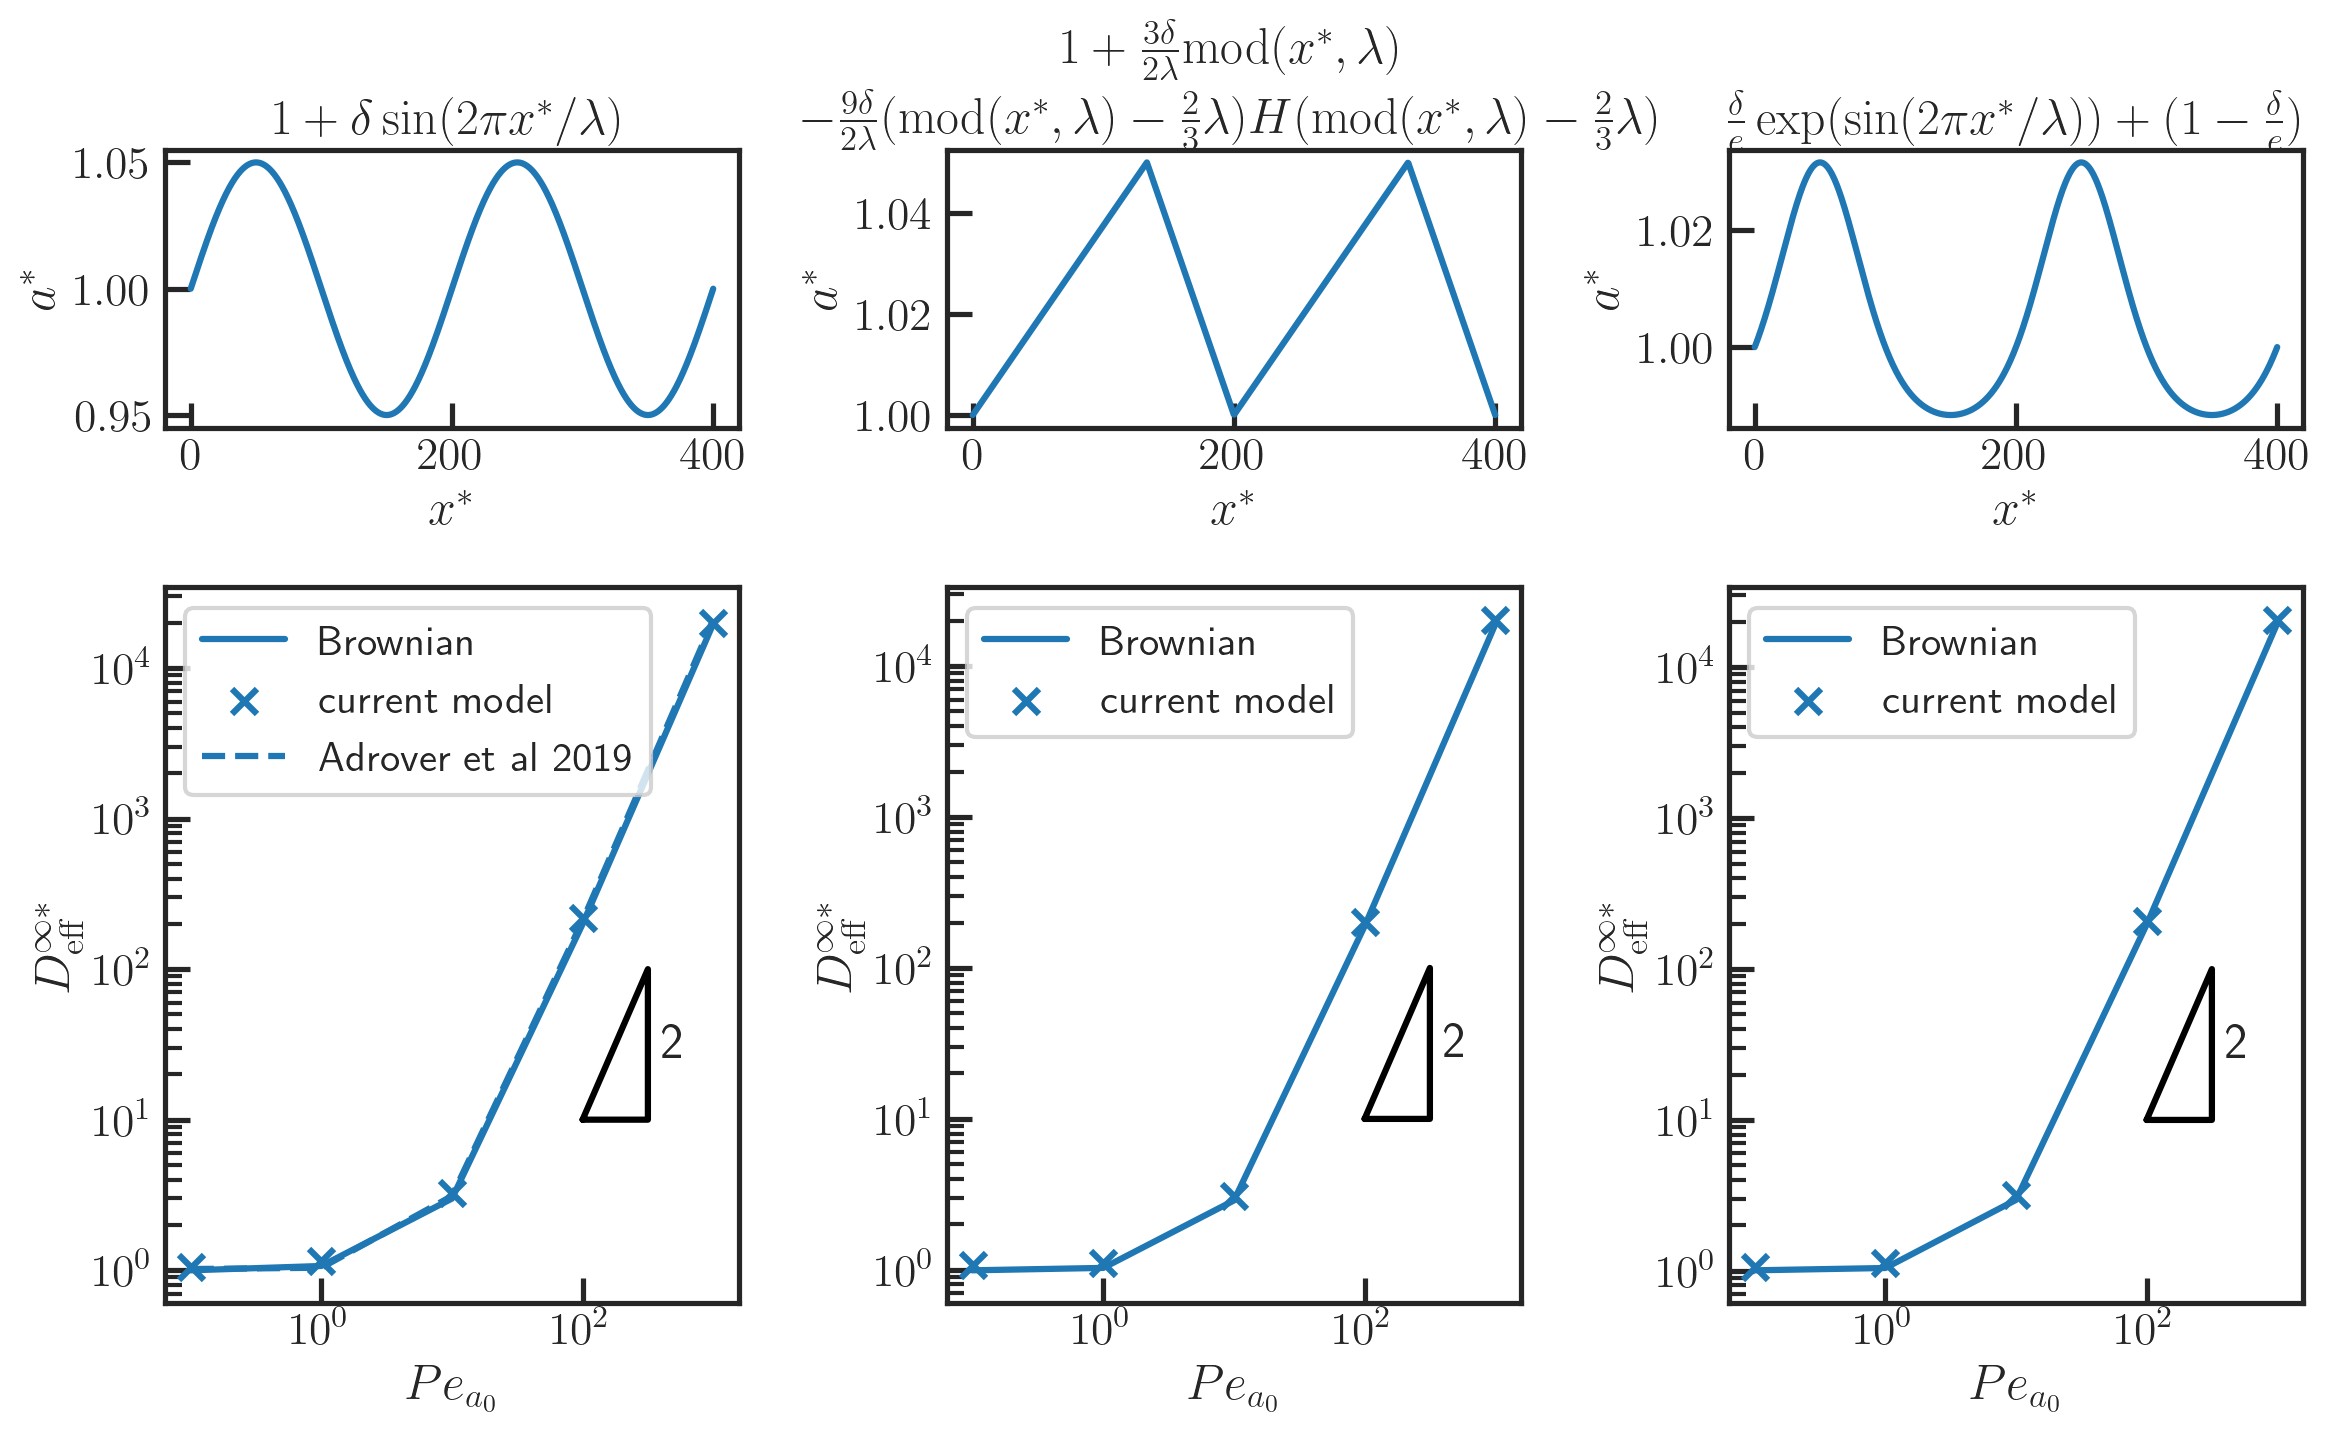

In [42]:
fig = plt.figure(dpi = 200, figsize = (12, 7.5))
gs = GridSpec(nrows=3, ncols=3)

ax0 = fig.add_subplot(gs[0, 0])
lambd = 200
delta = 0.05
func_x = lambda x: 1+delta*np.sin(2*np.pi*x/lambd)
x_plot = np.linspace(0,400,1000)
ax0.plot(x_plot, func_x(x_plot), color = 'C0')
plt.xlabel(r'$x^*$')
plt.ylabel(r'$a^*$')
plt.title(r'$1+\delta\sin(2\pi x^*/\lambda)$')
ax0.tick_params(axis='both', direction = 'in')


ax1 = fig.add_subplot(gs[0, 1])
lambd = 200
delta = 0.05
func_x = lambda x: 1 + delta*(x%lambd)/(lambd*2/3) - delta*(x%lambd-lambd*2/3)*(1/(lambd*1/3) + 1/(lambd*2/3))*np.heaviside(x%lambd-lambd*2/3, 0)
x_plot = np.linspace(0,400,1000)
ax1.plot(x_plot, func_x(x_plot), color = 'C0')
plt.xlabel(r'$x^*$')
plt.ylabel(r'$a^*$')
plt.title(r'$1+\frac{3\delta}{2\lambda}\mathrm{mod}(x^*,\lambda)$'+'\n'+r'$ - \frac{9\delta}{2\lambda}(\mathrm{mod}(x^*,\lambda)-\frac{2}{3}\lambda)H(\mathrm{mod}(x^*,\lambda)-\frac{2}{3}\lambda)$')
ax1.tick_params(axis='both', direction = 'in')

ax2 = fig.add_subplot(gs[0, 2])
lambd = 200
delta = 0.05
func_x = lambda x: np.exp(np.sin(2*np.pi*x/lambd))/np.exp(1)*delta + (1 - delta/np.exp(1))
x_plot = np.linspace(0,400,1000)
ax2.plot(x_plot, func_x(x_plot), color = 'C0')
plt.xlabel(r'$x^*$')
plt.ylabel(r'$a^*$')
plt.title(r'$\frac{\delta}{e}\exp(\sin(2\pi x^*/\lambda)) + (1-\frac{\delta}{e})$')
ax2.tick_params(axis='both', direction = 'in')

i = 0

ax3 = fig.add_subplot(gs[1:3, 0])
ax3.plot([0.1, 1, 10, 100, 1000], D_eff_sim[0, :], color = 'C'+str(i), label = 'Brownian')
ax3.scatter([0.1, 1, 10, 100, 1000], D_eff_curr[0, :], marker = 'x', color = 'C'+str(i), label = 'current model')
ax3.plot([0.1, 1, 10, 100, 1000], D_eff_lit[0, :], color = 'C'+str(i), linestyle = '--', label ='Adrover et al 2019')
plt.plot([100,100*np.sqrt(10),100*np.sqrt(10),100],[10,10,10*10, 10], color = 'black')
plt.text(400, 10*np.sqrt(10), '2', weight='bold', verticalalignment='center')
plt.xscale('log') 
plt.yscale('log')
plt.legend(fontsize = 15)
plt.xlabel(r'$Pe_{a_0}$')
plt.ylabel(r'$D_{\mathrm{eff}}^{\infty *}$')
ax3.tick_params(axis='both', which = 'both', direction = 'in')

ax4 = fig.add_subplot(gs[1:3, 1])
ax4.plot([0.1, 1, 10, 100, 1000], D_eff_sim_tri[0, :], color = 'C'+str(i), label = 'Brownian')
ax4.scatter([0.1, 1, 10, 100, 1000], D_eff_curr_tri[0, :], marker = 'x', color = 'C'+str(i), label = 'current model')
plt.plot([100,100*np.sqrt(10),100*np.sqrt(10),100],[10,10,10*10, 10], color = 'black')
plt.text(400, 10*np.sqrt(10), '2', weight='bold', verticalalignment='center')
plt.xscale('log') 
plt.yscale('log')
plt.legend(fontsize = 15)
plt.xlabel(r'$Pe_{a_0}$')
plt.ylabel(r'$D_{\mathrm{eff}}^{\infty *}$')
ax4.tick_params(axis='both', which = 'both', direction = 'in')

ax5 = fig.add_subplot(gs[1:3, 2])
ax5.plot([0.1, 1, 10, 100, 1000], D_eff_sim_expsin[0, :], color = 'C'+str(i), label = 'Brownian')
ax5.scatter([0.1, 1, 10, 100, 1000], D_eff_curr_expsin[0, :], marker = 'x', color = 'C'+str(i), label = 'current model')
plt.plot([100,100*np.sqrt(10),100*np.sqrt(10),100],[10,10,10*10, 10], color = 'black')
plt.text(400, 10*np.sqrt(10), '2', weight='bold', verticalalignment='center')
plt.xscale('log') 
plt.yscale('log')
plt.legend(fontsize = 15)
plt.xlabel(r'$Pe_{a_0}$')
plt.ylabel(r'$D_{\mathrm{eff}}^{\infty *}$')
ax5.tick_params(axis='both', which = 'both', direction = 'in')

plt.tight_layout()
plt.savefig('lit_figure3_lowRes.png', dpi = 150, bbox_inches = "tight")
plt.savefig('lit_figure3_highRes.png', dpi = 400, bbox_inches = "tight")

## Figure 6 -- arbitrary

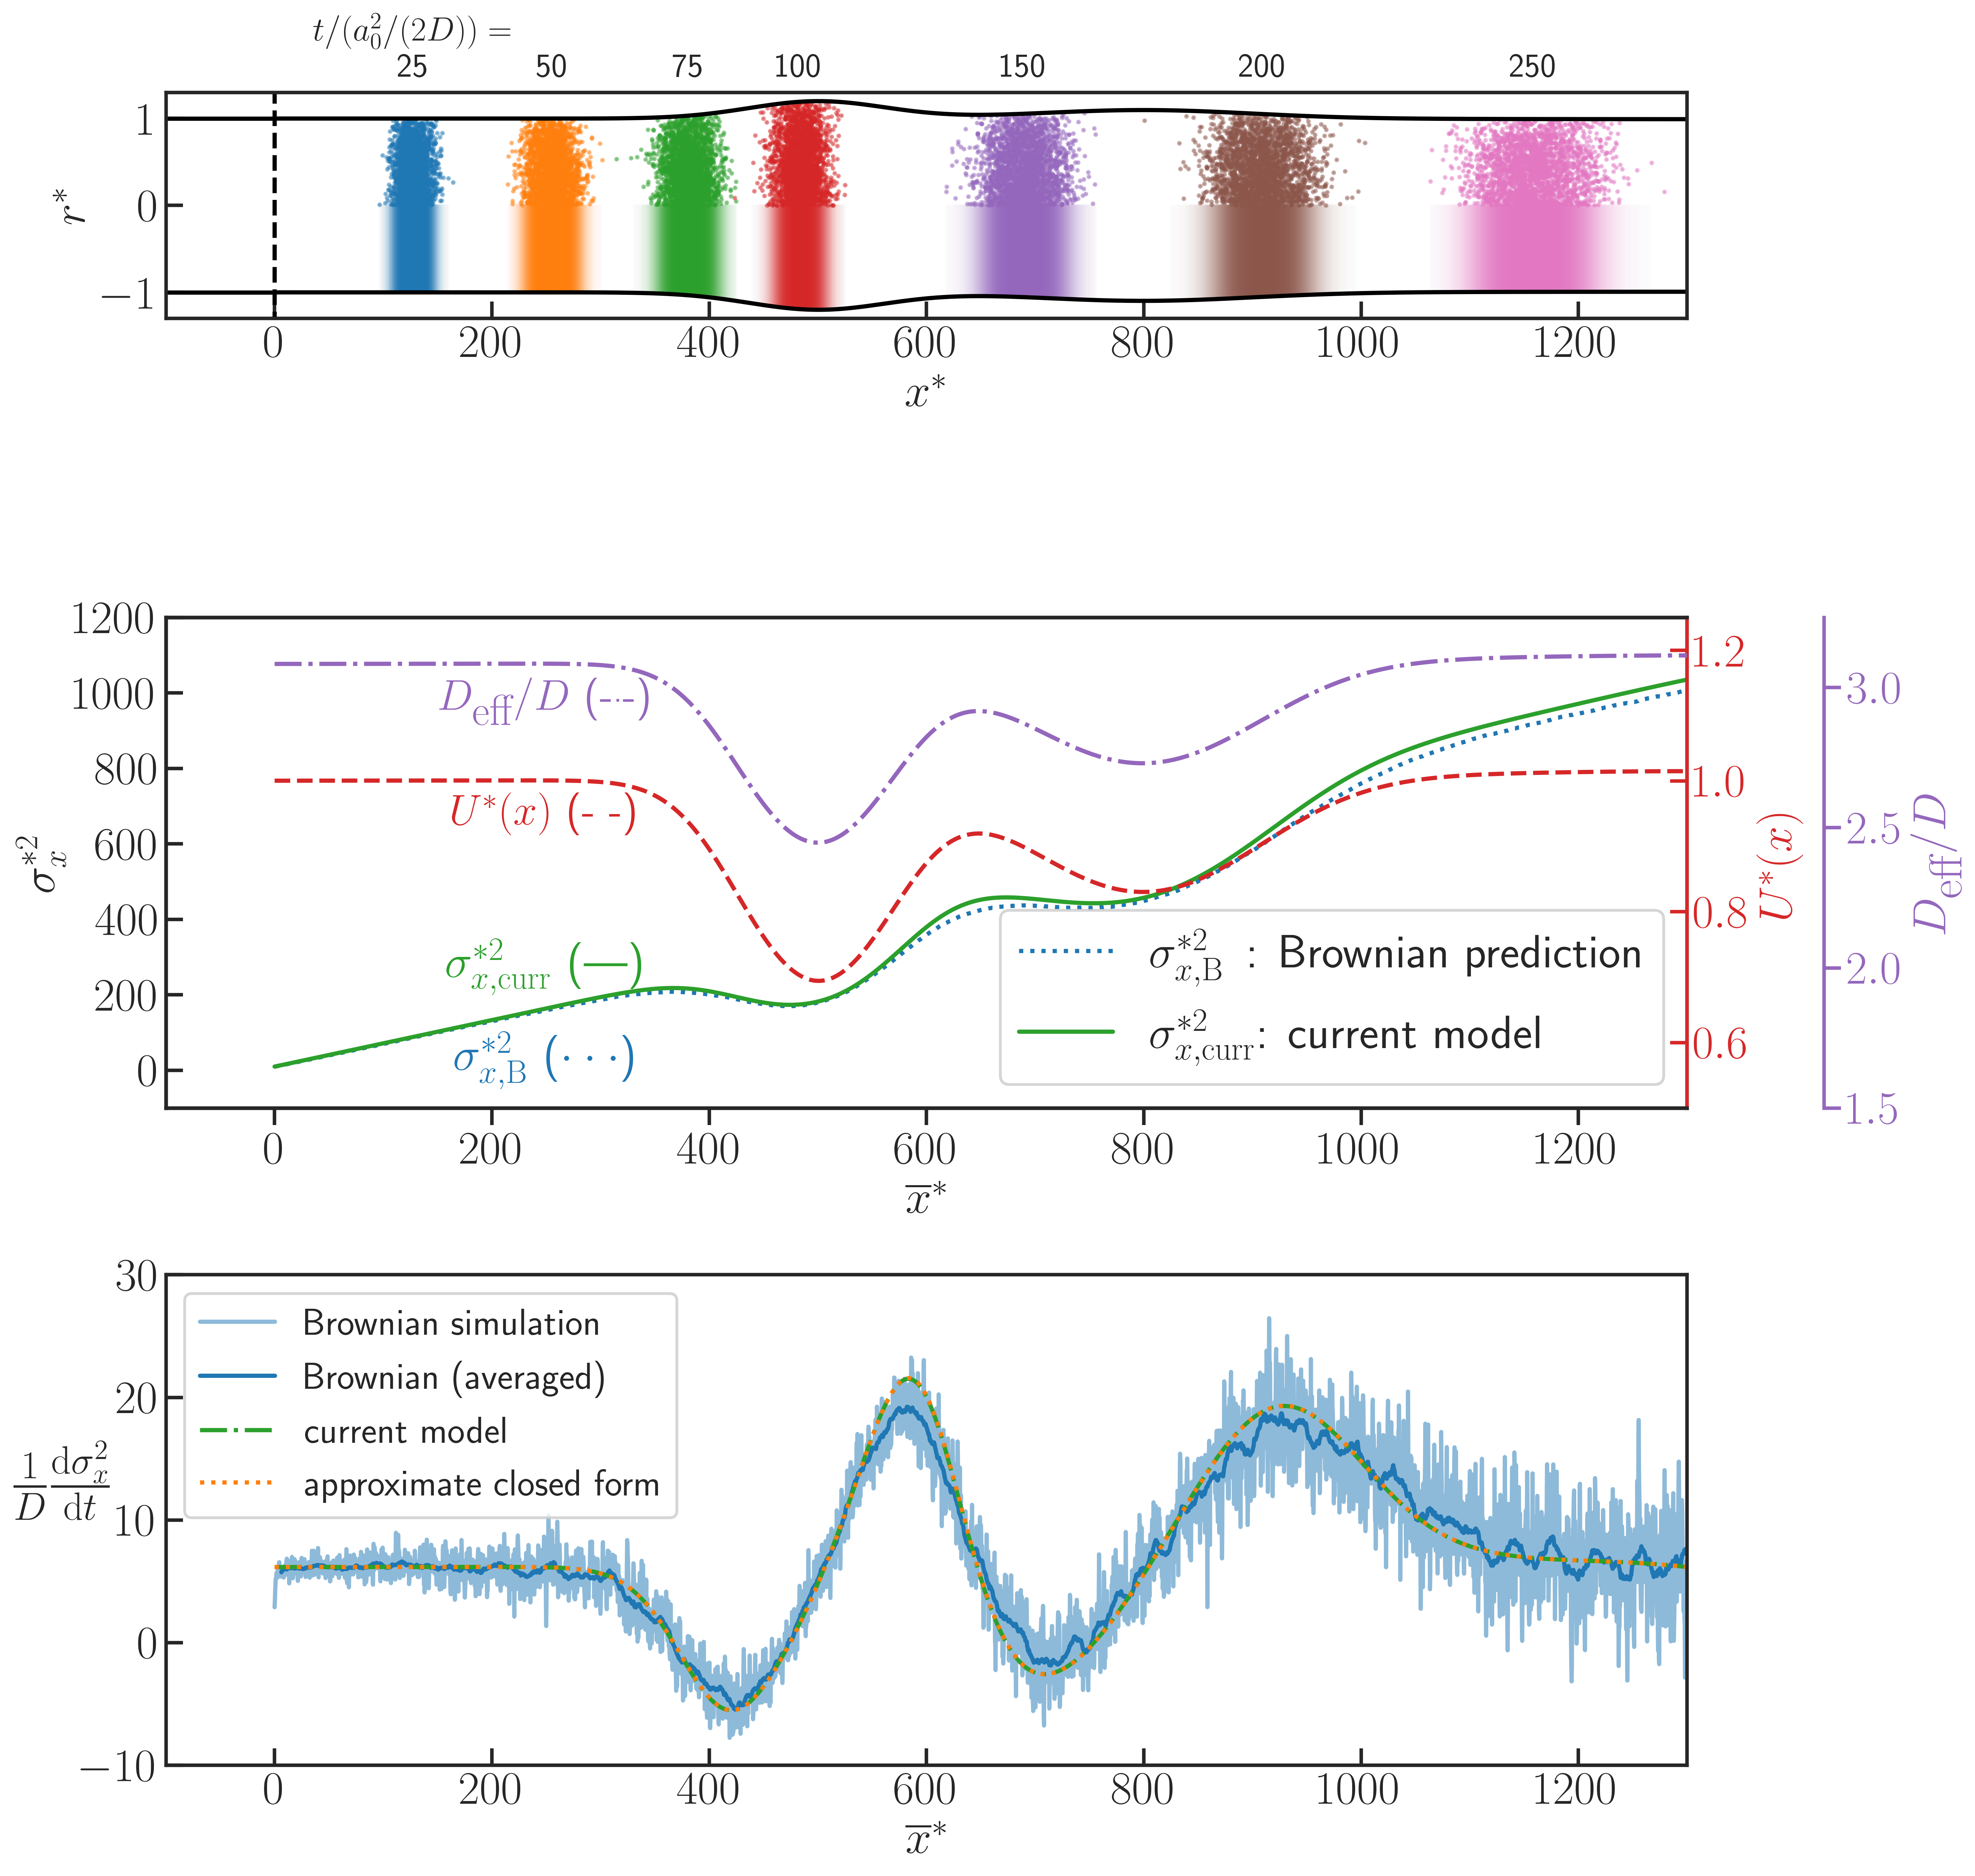

In [5]:
sns.set_context('talk')
sns.set_style('ticks')
name_head = 'result_var3_Pe0_10_initVar10_seed_'
func_x = lambda x: 1+0.2*np.exp(-(x-500)**2/8000) + 0.1*np.exp(-(x-800)**2/20000) + 0.2*np.exp(-(x-2000)**2/100000) - 0.1*np.exp(-(x-3500)**2/2000000)

plt.figure(dpi = 400, figsize = (15,14.625))
plt.subplot(3,1,1)
result = pickle.load(open(output_path+name_head+str(0), 'rb'))
plt.plot(result['x_range'][0:3500], func_x(result['x_range'][0:3500]), color = 'black')
plt.plot(result['x_range'][0:3500], -func_x(result['x_range'][0:3500]), color = 'black')
plt.plot(np.linspace(-100,0,200), func_x(np.linspace(-100,0,200)), color = 'black')
plt.plot(np.linspace(-100,0,200), -func_x(np.linspace(-100,0,200)), color = 'black')

#j_range = [4000, 8000, 12000, 16000, 20000]
j_range = [500, 1000, 1500, 2000, 3000, 4000, 5000]
cmap_list = ['Greys', 'Blues', 'Oranges', 'Greens', 'Reds', 'Purples']

for m, j2 in enumerate(j_range):
    j = np.argmin(np.abs(result['weighted_x'].flatten()[j2] - result['predicted_x_bar']))
    
    X = result['x'][:, j2]
    R = np.copy(result['r'][:, j2])
    R_plot = np.zeros_like(R)
    THETA = result['theta'][:, j2]
    loc_neg = THETA < 0
    R_plot = R[~loc_neg]
    Y = R_plot*np.sin(THETA[~loc_neg])
    X_plot = X[~loc_neg]
    plt.scatter(X_plot, Y, s = 1, alpha = 0.5, label = r'$t=$'+ '{:.1f}'.format(result['T'][j2]/(result['a0']**2/(2*result['D']))) + r'$a_0^2/(2D)$')
    
    xmin = np.min(X_plot)
    xmax = np.max(X_plot)
    i_plot = 200
    x_pdf = np.linspace(xmin, xmax, i_plot)
    alpha_all = (norm.pdf(x_pdf, result['predicted_x_bar'][j], 
                             np.sqrt(result['predicted_var_heuristic'][j]))/np.max(norm.pdf(x_pdf, result['predicted_x_bar'][j], 
                                                                                            np.sqrt(result['predicted_var_heuristic'][j])))
                 *np.exp(result['predicted_ln_cdx_heuristic'][j] - np.max(result['predicted_ln_cdx_heuristic'])))
    for i in range(i_plot-1):
        plt.fill_between(x_pdf[i:i+2], -func_x(x_pdf[i:i+2]), color = 'C'+str(m), alpha = alpha_all[i])
    
    if m == 0:
        plt.text(result['predicted_x_bar'][j], 1.4, r'$t/(a_0^2/(2D))=$'+ '\n{:.0f}'.format(result['T'][j2]/(result['a0']**2/(2*result['D']))), horizontalalignment='center', verticalalignment='bottom')
    else:
        plt.text(result['predicted_x_bar'][j], 1.4, '{:.0f}'.format(result['T'][j2]/(result['a0']**2/(2*result['D']))), horizontalalignment='center', verticalalignment='bottom')
    
# Define hexbin grid extent
xmin = np.min(result['x_range'][0:3500])-20
xmax = np.max(result['x_range'][0:3500])
ymin = -np.max(func_x(result['x_range'][0:3500]))
ymax = 0
plt.vlines(0, ymin-0.2, -ymin+0.2, color = 'black', linestyle = 'dashed')
plt.gca().tick_params(axis='both', direction = 'in')
ext = (xmin, xmax, ymin, ymax)
plt.xlim([-100, 1300])
plt.ylim([ymin-0.1, -ymin+0.1])
plt.xlabel(r'$x^*$', fontsize = 25)
plt.ylabel(r'$r^*$', fontsize = 25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
#plt.text()
plt.gca().set(aspect=80)

plt.subplot(3,1,2)
weighted_x_mean = []
weighted_var_mean = []
predicted_x_bar_mean = []
predicted_var_mean = []
for i in range(5):
    result = pickle.load(open(output_path+name_head+str(i)+'_summarized', 'rb'))
    weighted_x_mean.append(result['weighted_x'].flatten())
    weighted_var_mean.append(result['weighted_var'].flatten())
    predicted_x_bar_mean.append(result['predicted_x_bar'])
    predicted_var_mean.append(result['predicted_var_heuristic'])
weighted_x_mean = np.mean(np.vstack(weighted_x_mean), axis = 0)
weighted_var_mean = np.mean(np.vstack(weighted_var_mean), axis = 0)
predicted_x_bar_mean = np.mean(np.vstack(predicted_x_bar_mean), axis = 0)
predicted_var_mean = np.mean(np.vstack(predicted_var_mean), axis = 0)
plt.plot(weighted_x_mean, weighted_var_mean, label = r'$\sigma^{*2}_{x, \mathrm{B}}\enspace$'+': Brownian prediction', color = 'C0', linestyle = 'dotted')
plt.plot(predicted_x_bar_mean, predicted_var_mean, label = r'$\sigma^{*2}_{x, \mathrm{curr}}$'+': current model', color = 'C2', alpha = 1)
plt.xlabel(r'$\overline{x}^*$', fontsize = 25)
plt.ylabel(r'$\sigma^{*2}_x$', fontsize = 25)
plt.ylim([-100, 1200])
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.text(250, 200, r'$\sigma^{*2}_{x, \mathrm{curr}}$'+' (—)', color = 'C2', fontsize = 25, horizontalalignment='center', verticalalignment='bottom')
plt.text(250, -50, r'$\sigma^{*2}_{x, \mathrm{B}}$'+r' ($\cdot\cdot\cdot$)', color = 'C0', fontsize = 25, horizontalalignment='center', verticalalignment='bottom')

ax1 = plt.gca()
ax1.tick_params(axis='y', direction = 'in')
ax2 = ax1.twinx()
alt_color = 'C3'

a = func_x(result['weighted_x'].flatten())
U = result['U0']*result['a0']**2/func_x(result['weighted_x'].flatten())**2
beta_of_x = interp1d(result['x_range'], result['beta'], kind='cubic')

ax2.plot(result['weighted_x'].flatten(), U, alt_color, linestyle = 'dashed')
ax2.set_ylabel(r'$U^*(x)$', color=alt_color, fontsize = 25)
ax2.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4])
ax2.set_ylim([0.5,1.25])
ax2.tick_params(axis='y', color=alt_color, labelcolor=alt_color, labelsize = 25, direction = 'in')
ax2.spines['right'].set_color(alt_color)
ax2.grid(False)
plt.text(250, 0.95, r'$U^*(x)$'+' (- -)', color = 'C3', fontsize = 23, horizontalalignment='center', verticalalignment='center')

twin2 = ax1.twinx()
alt_color2 = 'C4'
twin2.spines.right.set_position(("axes", 1.09))
twin2.plot(result['weighted_x'].flatten(), 1 + 1/48*U**2*a**2/result['D']**2 - 1/6*U*a/result['D']*beta_of_x(result['weighted_x'].flatten()) , 
           color=alt_color2, linestyle = 'dashdot')
twin2.set_ylabel(r'$D_{\textrm{eff}}/D$', color = alt_color2, fontsize = 25)
twin2.tick_params(axis = 'y', color = alt_color2, labelcolor = alt_color2, labelsize = 25)
twin2.spines['right'].set_color(alt_color2)
twin2.grid(False)
plt.text(250, 2.95, r'$D_{\textrm{eff}}/D$'+' (-·-)', color = 'C4', fontsize = 23, horizontalalignment='center', verticalalignment='center')
plt.xlim([-100, 1300])
plt.ylim([1.5, 3.25])

ax1.legend(fontsize = 25, loc = 'lower right')

plt.subplot(3,1,3)
beta_calc = beta_of_x(result['predicted_x_bar'])
a_calc = func_x(result['predicted_x_bar'])
gamma_calc = func_x(result['predicted_x_bar'])
U_calc = result['U0']*result['a0']**2/a_calc**2
Pe_calc = U_calc*a_calc/result['D']
plt.plot(result['weighted_x'].flatten(), np.gradient(weighted_var_mean, result['dt'])/result['D'], alpha = 0.5, color = 'C0', label = 'Brownian simulation')
N = 50
conv_x = np.convolve(result['weighted_x'].flatten(), np.ones(N)/N, mode='valid')
conv = np.convolve(np.gradient(weighted_var_mean, result['dt'])/result['D'], np.ones(N)/N, mode='valid')
plt.plot(conv_x,conv, label = 'Brownian (averaged)')
plt.plot(predicted_x_bar_mean, 
         (np.gradient(predicted_var_mean, result['dt'])/result['D']), alpha = 1, linestyle = 'dashdot', color = 'C2', label = 'current model')
plt.plot(predicted_x_bar_mean, 
         (-4*Pe_calc*beta_calc*(1+beta_calc**2/6)*predicted_var_mean/a_calc**2 + 2*(1+1/48*Pe_calc**2 - 1/6*Pe_calc*beta_calc)), 
         color = 'C1', label = 'approximate closed form', linestyle = 'dotted')
plt.xlabel(r'$\overline{x}^{*}$', fontsize = 25)
plt.ylabel(r'$\frac{1}{D}\frac{\mathrm{d}\sigma^2_x}{\mathrm{d}t}$', rotation = 0, fontsize = 30, labelpad = 10)
plt.xlim([-100, 1300])
plt.ylim([-10,30])
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize = 20, loc = 'upper left')
plt.gca().tick_params(axis='both', direction = 'in')
plt.tight_layout()
plt.savefig('arbitrary2_initVar_lowRes.png', dpi = 150, bbox_inches = "tight")
plt.savefig('arbitrary2_initVar_highRes.png', dpi = 400, bbox_inches = "tight")
plt.show()

## Figure 7A - constant variance channel

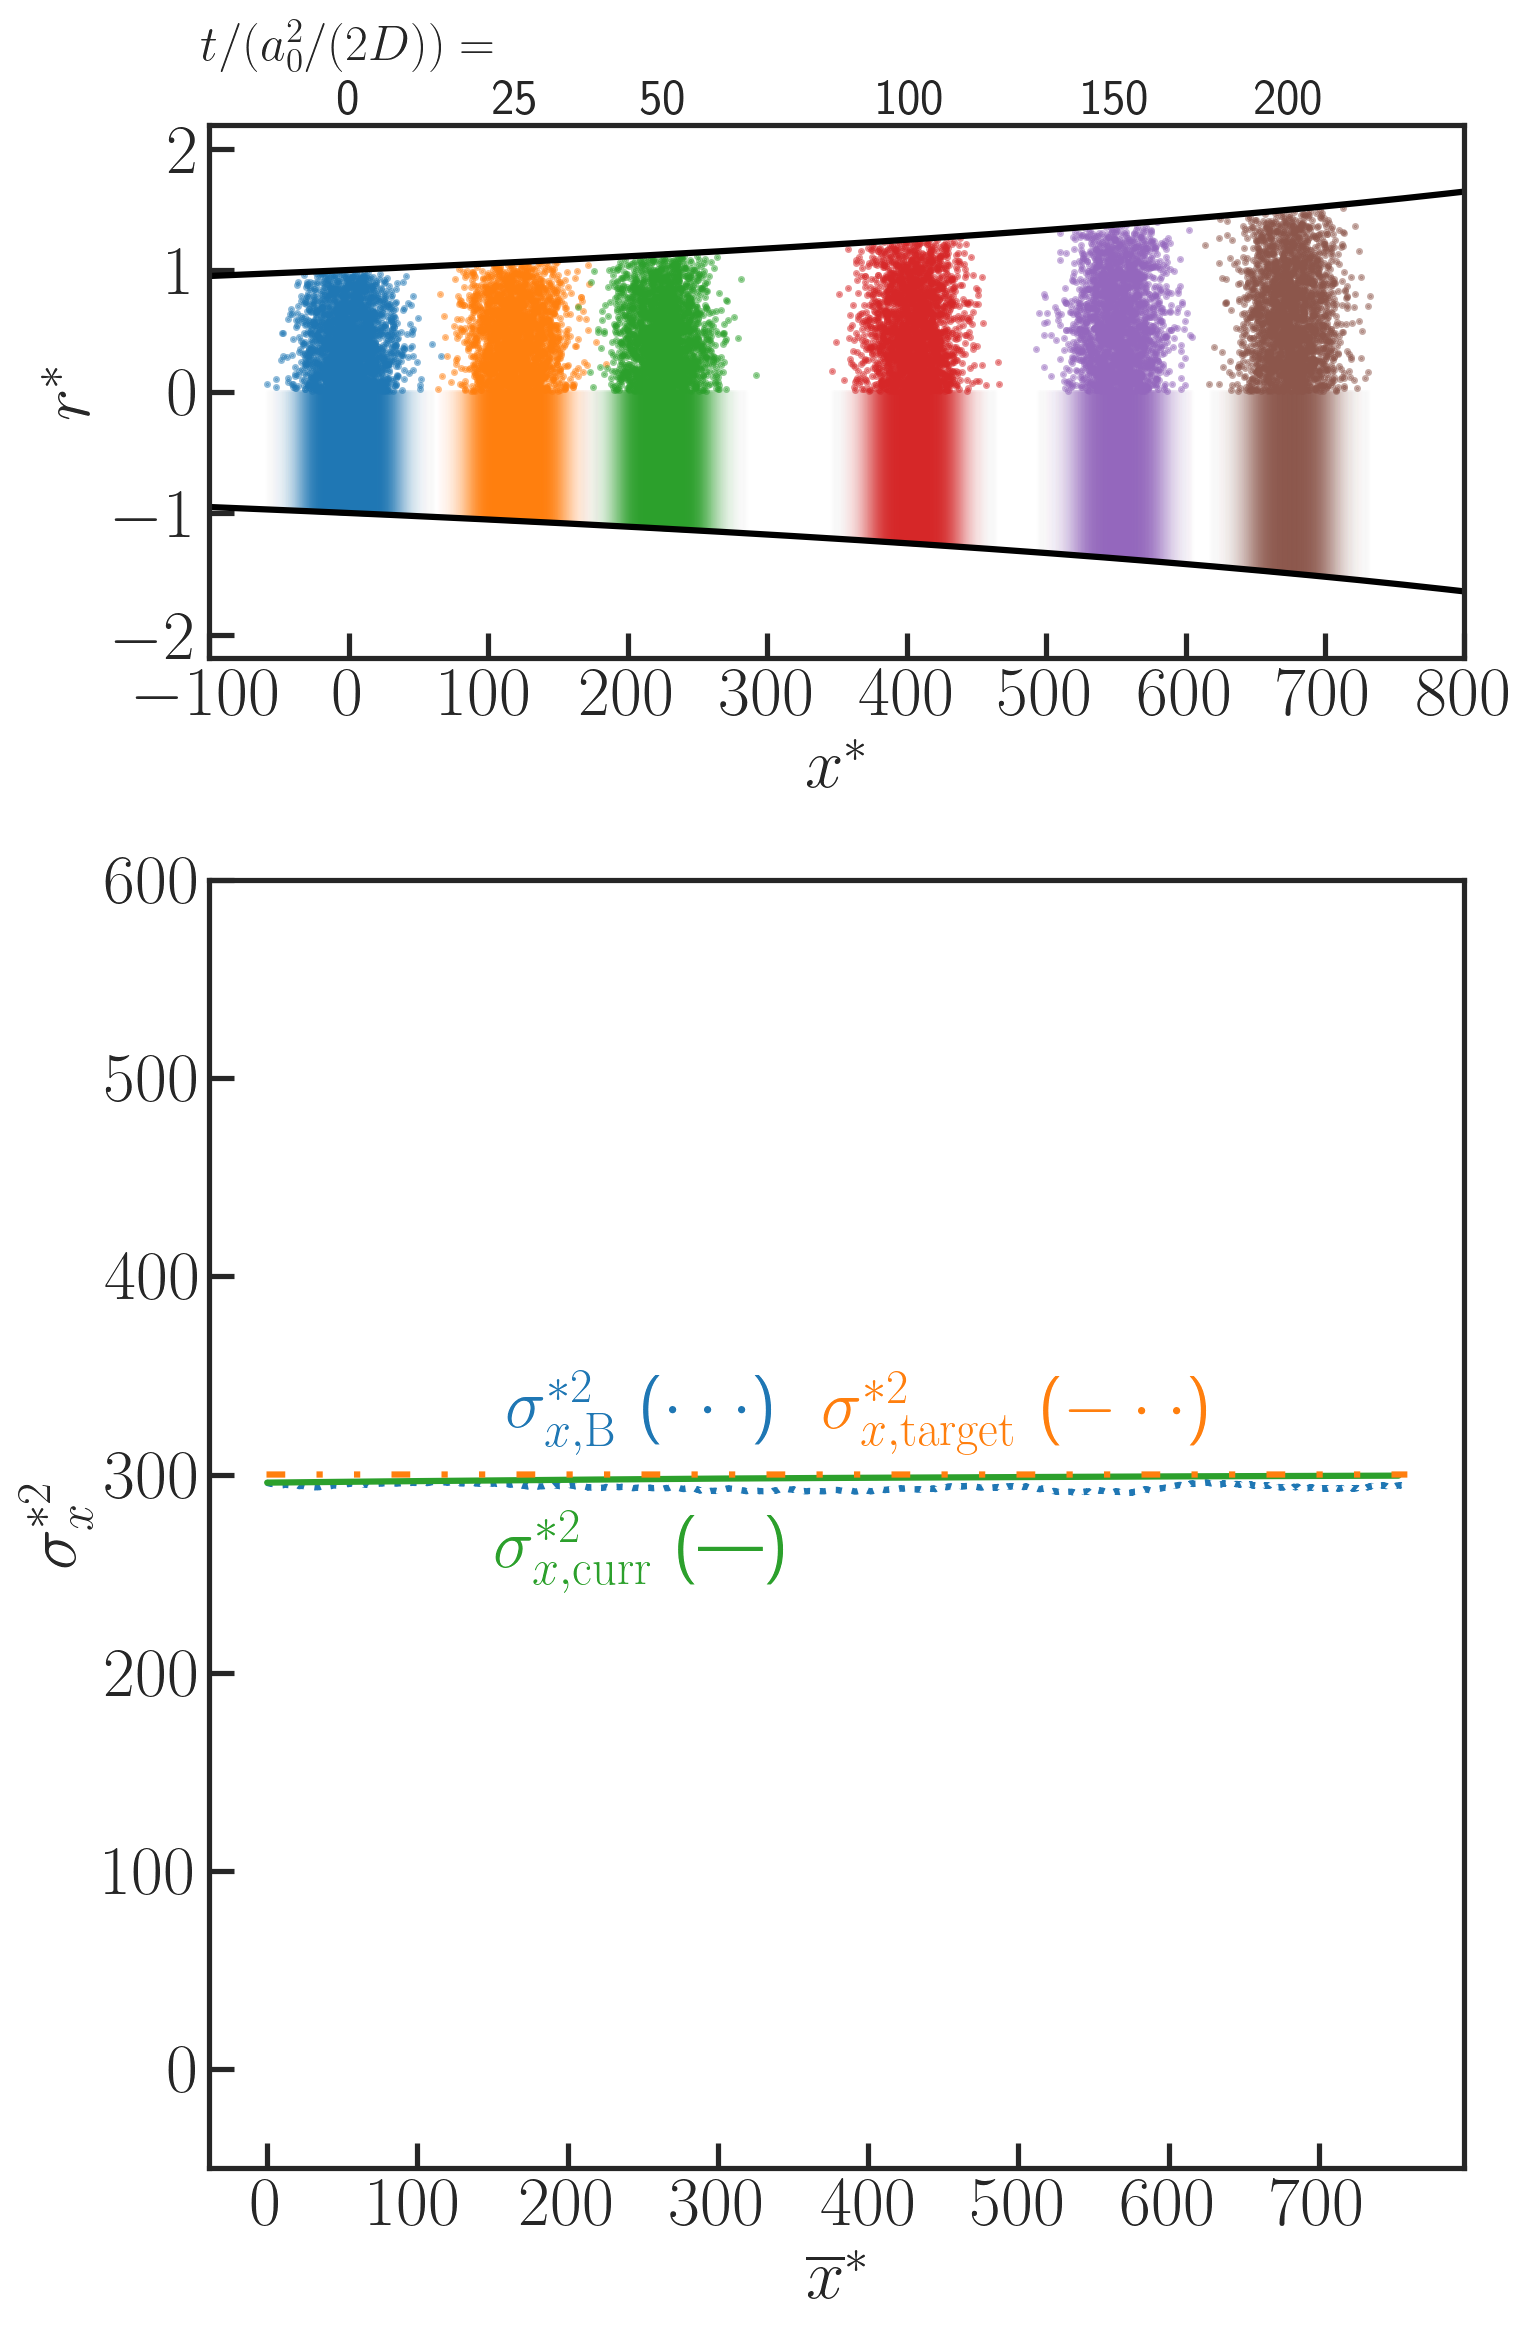

In [21]:
sns.set_context('talk')
fig = plt.figure(dpi = 200, figsize = (8,12))
gs = GridSpec(nrows=3, ncols=1)

ax0 = fig.add_subplot(gs[0, 0])

sigx2 = 300
U0 = 1
a0 = 1
D = 0.1
a_range = np.linspace(0.5,200,1000)
c1 = +12*sigx2/(U0**2*a0**4/(48*D**2))*np.log(a0) + (U0**2*a0**4/(48*D**2)-12*sigx2)*np.log(a0**2 + U0**2*a0**4/(48*D**2))/(U0**2*a0**4/(24*D**2))
x_of_a = ((+12*sigx2/(U0**2*a0**4/(48*D**2))*np.log(a_range) + (U0**2*a0**4/(48*D**2)-12*sigx2)*np.log(a_range**2 + U0**2*a0**4/(48*D**2))/(U0**2*a0**4/(24*D**2))) - c1)/(6*D/(U0*a0**2))
beta_cv = np.gradient(a_range, x_of_a)

sns.set_context('talk')
sns.set_style('ticks')
name_head = 'result_constantSig_Pe0_10_initVar300_seed_'
func_x = interp1d(x_of_a, a_range, kind = 'cubic')

result = pickle.load(open(output_path+name_head+str(0), 'rb'))
plt.plot(np.linspace(-100,800,1000), func_x(np.linspace(-100,800,1000)), color = 'black')
plt.plot(np.linspace(-100,800,1000), -func_x(np.linspace(-100,800,1000)), color = 'black')

j_range = [0, 500, 1000, 2000, 3000, 4000]
cmap_list = ['Greys', 'Blues', 'Oranges', 'Greens', 'Reds', 'Purples']

for m, j2 in enumerate(j_range):
    j = np.argmin(np.abs(result['weighted_x'].flatten()[j2] - result['predicted_x_bar']))
    
    X = result['x'][:, j2]
    R = np.copy(result['r'][:, j2])
    R_plot = np.zeros_like(R)
    THETA = result['theta'][:, j2]
    loc_neg = THETA < 0
    R_plot = R[~loc_neg]
    Y = R_plot*np.sin(THETA[~loc_neg])
    X_plot = X[~loc_neg]
    plt.scatter(X_plot, Y, s = 1, alpha = 0.5, label = r'$t=$'+ '{:.1f}'.format(result['T'][j2]/(result['a0']**2/(2*result['D']))) + r'$a_0^2/(2D)$')
     
    xmin = np.min(X_plot)
    xmax = np.max(X_plot)
    i_plot = 200
    x_pdf = np.linspace(xmin, xmax, i_plot)
    alpha_all = (norm.pdf(x_pdf, result['predicted_x_bar'][j], 
                             np.sqrt(result['predicted_var_heuristic'][j]))/np.max(norm.pdf(x_pdf, result['predicted_x_bar'][j], 
                                                                                            np.sqrt(result['predicted_var_heuristic'][j])))
                 *np.exp(result['predicted_ln_cdx_heuristic'][j] - np.max(result['predicted_ln_cdx_heuristic'])))
    for i in range(i_plot-1):
        plt.fill_between(x_pdf[i:i+2], -func_x(x_pdf[i:i+2]), color = 'C'+str(m), alpha = alpha_all[i])
    
    if m == 0:
        plt.text(result['predicted_x_bar'][j], 2.2, r'$t/(a_0^2/(2D))=$'+ '\n{:.0f}'.format(result['T'][j2]/(result['a0']**2/(2*result['D']))), horizontalalignment='center', verticalalignment='bottom')
    else:
        plt.text(result['predicted_x_bar'][j], 2.2, '{:.0f}'.format(result['T'][j2]/(result['a0']**2/(2*result['D']))), horizontalalignment='center', verticalalignment='bottom')
    
# Define hexbin grid extent
xmin = np.min(result['x_range'][0:3500])-20
xmax = np.max(result['x_range'][0:3500])
ymin = -np.max(func_x(result['x_range'][0:3500]))
ymax = 0
#plt.vlines(0, ymin-0.2, -ymin+0.2, color = 'black', linestyle = 'dashed')
ext = (xmin, xmax, ymin, ymax)
plt.xlim([-100, 800])
plt.ylim([ymin-0.1, -ymin+0.1])
plt.xlabel(r'$x^*$', fontsize = 25)
plt.ylabel(r'$r^*$', fontsize = 25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
ax0.tick_params(axis='both', direction = 'in')

ax1 = fig.add_subplot(gs[1:3, 0])
weighted_x_mean = []
weighted_var_mean = []
predicted_x_bar_mean = []
predicted_var_mean = []
for i in range(5):
    result = pickle.load(open(output_path+name_head+str(i)+'_summarized', 'rb'))
    weighted_x_mean.append(result['weighted_x'].flatten())
    weighted_var_mean.append(result['weighted_var'].flatten())
    predicted_x_bar_mean.append(result['predicted_x_bar'])
    predicted_var_mean.append(result['predicted_var_heuristic'])
weighted_x_mean = np.mean(np.vstack(weighted_x_mean), axis = 0)
weighted_var_mean = np.mean(np.vstack(weighted_var_mean), axis = 0)
predicted_x_bar_mean = np.mean(np.vstack(predicted_x_bar_mean), axis = 0)
predicted_var_mean = np.mean(np.vstack(predicted_var_mean), axis = 0)

plt.plot(weighted_x_mean, weighted_var_mean, label = r'$\sigma^2_{x, \mathrm{B}}\enspace$'+': Brownian prediction', color = 'C0', linestyle = 'dotted')
#plt.plot(result['predicted_x_bar'], result['predicted_var_heuristic'], label = r'$\sigma^2_{x, \mathrm{curr}}$'+': current model', color = 'C2', alpha = 1)
plt.plot(predicted_x_bar_mean, predicted_var_mean, label = r'$\sigma^2_{x, \mathrm{curr}}$'+': current model', color = 'C2', alpha = 1)
plt.plot(weighted_x_mean, sigx2*np.ones_like(weighted_x_mean), label = r'$\sigma^2_{x, \mathrm{target}}$'+': target', color = 'C1', alpha = 1, linestyle = (0, (3,5,1,5,1,5)))
plt.xlabel(r'$\overline{x}^*$', fontsize = 25)
plt.ylabel(r'$\sigma^{*2}_x$', fontsize = 25)
plt.ylim([-50, 600])
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
ax1.tick_params(axis='both', direction = 'in')

plt.text(250, 240, r'$\sigma^{*2}_{x, \mathrm{curr}}$'+' (—)', color = 'C2', fontsize = 25, horizontalalignment='center', verticalalignment='bottom')
plt.text(250, 310, r'$\sigma^{*2}_{x, \mathrm{B}}$'+r' ($\cdot\cdot\cdot$)', color = 'C0', fontsize = 25, horizontalalignment='center', verticalalignment='bottom')
plt.text(500, 310, r'$\sigma^{*2}_{x, \mathrm{target}}$'+r' ($-\cdot\cdot$)', color = 'C1', fontsize = 25, horizontalalignment='center', verticalalignment='bottom')
plt.tight_layout()
plt.savefig('Fig_constantSig2_initVar_lowRes.png', dpi = 150)
plt.savefig('Fig_constantSig2_initVar_highRes.png', dpi = 400)

## Figure 7B - sinusoidal spatial variance channel

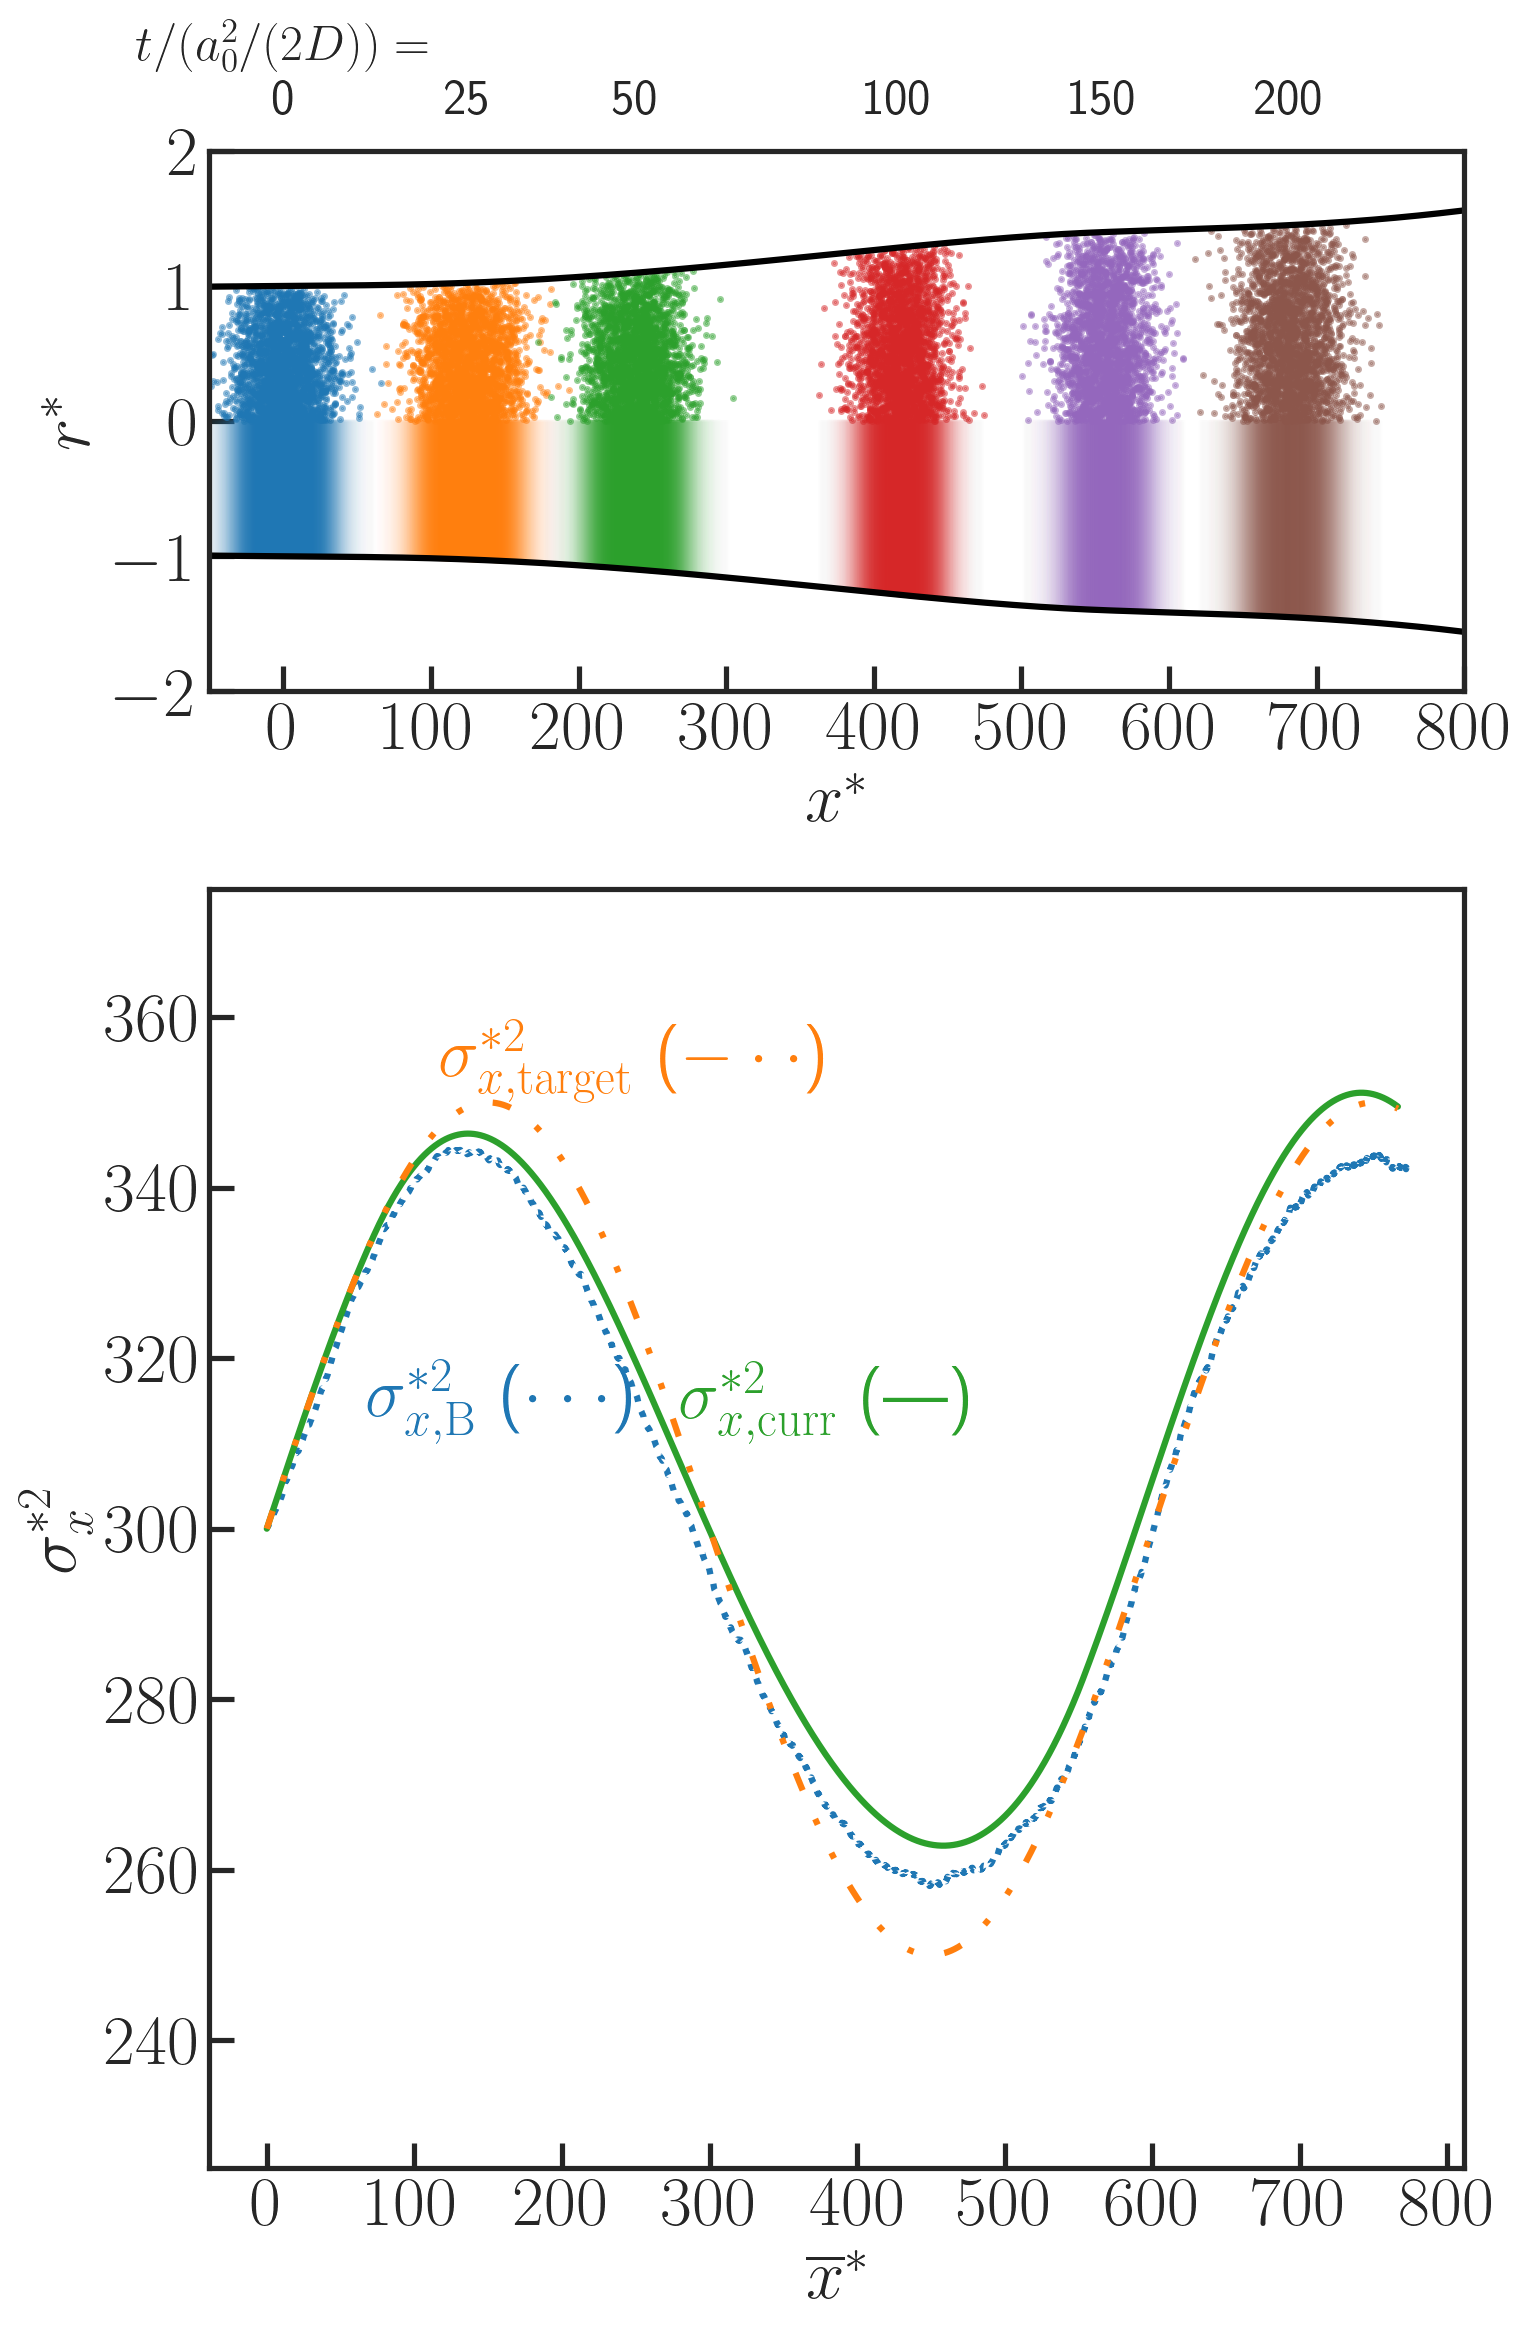

In [23]:
sns.set_context('talk')
sns.set_style('ticks')
name_head = 'result_sineSig2_Pe0_10_initVar300_seed_'

fig = plt.figure(dpi = 200, figsize = (8,12))
gs = GridSpec(nrows=3, ncols=1)

ax0 = fig.add_subplot(gs[0, 0])

result = pickle.load(open(output_path+name_head+str(0), 'rb'))

sigx2 = 300
delt = 50
lamb = 600
U0 = 1
a0 = 1
D = 0.1
def engineered(x, a): return (-2*np.pi*delt/lamb*np.cos(2*np.pi*x/lamb) +2*a**2*D/(U0*a0**2) + 1/24*U0*a0**2/D)/(4*(sigx2+delt*np.sin(2*np.pi*x/lamb))/a + a/3)

sol = solve_ivp(engineered, [0, 1600], [a0], t_eval=np.linspace(0, 1600, 1600))
sol2 = solve_ivp(engineered, [0, -1000], [a0], t_eval=np.linspace(0, -1000, 1000))
func_x = interp1d(np.hstack([sol2.t[1:], sol.t]), np.hstack([sol2.y.flatten()[1:], sol.y.flatten()]), kind = 'cubic')
plt.plot(np.linspace(-100,1000,1000), func_x(np.linspace(-100,1000,1000)), color = 'black')
plt.plot(np.linspace(-100,1000,1000), -func_x(np.linspace(-100,1000,1000)), color = 'black')

j_range = [0,500, 1000, 2000, 3000, 4000]
cmap_list = ['Greys', 'Blues', 'Oranges', 'Greens', 'Reds', 'Purples']

for m, j2 in enumerate(j_range):
    j = np.argmin(np.abs(result['weighted_x'].flatten()[j2] - result['predicted_x_bar']))
    
    X = result['x'][:, j2]
    R = np.copy(result['r'][:, j2])
    R_plot = np.zeros_like(R)
    THETA = result['theta'][:, j2]
    loc_neg = THETA < 0
    R_plot = R[~loc_neg]
    Y = R_plot*np.sin(THETA[~loc_neg])
    X_plot = X[~loc_neg]
    plt.scatter(X_plot, Y, s = 1, alpha = 0.5, label = r'$t=$'+ '{:.1f}'.format(result['T'][j2]/(result['a0']**2/(2*result['D']))) + r'$a_0^2/(2D)$')
     
    xmin = np.min(X_plot)
    xmax = np.max(X_plot)
    i_plot = 200
    x_pdf = np.linspace(xmin, xmax, i_plot)
    alpha_all = (norm.pdf(x_pdf, result['predicted_x_bar'][j], 
                             np.sqrt(result['predicted_var_heuristic'][j]))/np.max(norm.pdf(x_pdf, result['predicted_x_bar'][j], 
                                                                                            np.sqrt(result['predicted_var_heuristic'][j])))
                 *np.exp(result['predicted_ln_cdx_heuristic'][j] - np.max(result['predicted_ln_cdx_heuristic'])))
    for i in range(i_plot-1):
        plt.fill_between(x_pdf[i:i+2], -func_x(x_pdf[i:i+2]), color = 'C'+str(m), alpha = alpha_all[i])
    
    if m == 0:
        plt.text(result['predicted_x_bar'][j], 2.2, r'$t/(a_0^2/(2D))=$'+ '\n{:.0f}'.format(result['T'][j2]/(result['a0']**2/(2*result['D']))), horizontalalignment='center', verticalalignment='bottom')
    else:
        plt.text(result['predicted_x_bar'][j], 2.2, '{:.0f}'.format(result['T'][j2]/(result['a0']**2/(2*result['D']))), horizontalalignment='center', verticalalignment='bottom')
    
# Define hexbin grid extent
xmin = np.min(result['x_range'][0:3500])-20
xmax = np.max(result['x_range'][0:3500])
ymin = -np.max(func_x(result['x_range'][0:3500]))
ymax = 0
#plt.vlines(0, ymin-0.2, -ymin+0.2, color = 'black', linestyle = 'dashed')
#ext = (xmin, xmax, ymin, ymax)
plt.xlim([-50, 800])
plt.ylim([-2,2])
plt.xlabel(r'$x^*$', fontsize = 25)
plt.ylabel(r'$r^*$', fontsize = 25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
ax0.tick_params(axis='both', direction = 'in')

ax1 = fig.add_subplot(gs[1:3, 0])
weighted_x_mean = []
weighted_var_mean = []
predicted_x_mean = []
predicted_var_mean = []
for i in range(5):
    result = pickle.load(open(output_path+name_head+str(i)+'_summarized', 'rb'))
    weighted_x_mean.append(result['weighted_x'].flatten())
    weighted_var_mean.append(result['weighted_var'].flatten())
    predicted_x_mean.append(result['predicted_x_bar'].flatten())
    predicted_var_mean.append(result['predicted_var_heuristic'].flatten())
weighted_x_mean = np.mean(np.vstack(weighted_x_mean), axis = 0)
weighted_var_mean = np.mean(np.vstack(weighted_var_mean), axis = 0)
predicted_x_mean = np.mean(np.vstack(predicted_x_mean), axis = 0)
predicted_var_mean = np.mean(np.vstack(predicted_var_mean), axis = 0)

plt.plot(weighted_x_mean, weighted_var_mean, label = r'$\sigma^2_{x, \mathrm{B}}\enspace$'+': Brownian prediction', color = 'C0', linestyle = 'dotted')
plt.plot(predicted_x_mean, predicted_var_mean, label = r'$\sigma^2_{x, \mathrm{curr}}$'+': current model', color = 'C2', alpha = 1)
plt.plot(predicted_x_mean, sigx2+delt*np.sin(2*np.pi*predicted_x_mean/lamb), label = r'$\sigma^2_{x, \mathrm{target}}$'+': target', color = 'C1', alpha = 1, linestyle = (0, (3,5,1,5,1,5)))
plt.xlabel(r'$\overline{x}^*$', fontsize = 25)
plt.ylabel(r'$\sigma^{*2}_x$', fontsize = 25)
plt.ylim([225, 375])
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
ax1.tick_params(axis='both', direction = 'in')
plt.text(380, 310, r'$\sigma^{*2}_{x, \mathrm{curr}}$'+' (—)', color = 'C2', fontsize = 25, horizontalalignment='center', verticalalignment='bottom')
plt.text(160, 310, r'$\sigma^{*2}_{x, \mathrm{B}}$'+r' ($\cdot\cdot\cdot$)', color = 'C0', fontsize = 25, horizontalalignment='center', verticalalignment='bottom')
plt.text(250, 350, r'$\sigma^{*2}_{x, \mathrm{target}}$'+r' ($-\cdot\cdot$)', color = 'C1', fontsize = 25, horizontalalignment='center', verticalalignment='bottom')

#ax1.legend(fontsize = 25, loc = 'lower left')
plt.tight_layout()
plt.savefig('Fig_sineSig3_initVar_lowRes.png', dpi = 150)
plt.savefig('Fig_sineSig3_initVar_highRes.png', dpi = 400)